本ノートブックの目的はCovid-19前後の人間の行動変化を分析することにある．

In [1]:
# パス追加
import sys
sys.path.append('/home/is/akiyoshi-n/my-project')

### 使用ライブラリ

In [2]:
import os
# 使用するGPUを指定. この環境変数の場所は，pytorchをimportする前に入れる
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from pathlib import Path
from src.my_project.dataset import load_dataset_4class_Multi_classification, load_emotion_text_dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from src.my_project.train_v2 import MultiClassClassifier,MultilabelTrainer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import japanize_matplotlib

### パラメータ設定

In [3]:
# 最大トークン数
MAX_LEN = 128
# バッチサイズ
BATCH_SIZE = 16
# 乱数シード
SEED = 2024
# クラス数
NUM_LABELS = 4
# 閾値
THRESH = 0.5

### データセットへのパス設定

In [4]:
# データの読み込み
DATASET_PATH = Path('/home/is/akiyoshi-n/my-project/data')

### Covid-19前後のデータセット

In [5]:
data_2019_2 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2019_season1.xlsx")
data_2019_5 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2019_season2.xlsx")
data_2019_8 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2019_season3.xlsx")
data_2019_11 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2019_season4.xlsx")
data_2020_2 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2020_season1.xlsx")
data_2020_5 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2020_season2.xlsx")
data_2020_8 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2020_season3.xlsx")
data_2020_11 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2020_season4.xlsx")
data_2021_3 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2021_season1.xlsx")
data_2021_5 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2021_season2.xlsx")
data_2021_8 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2021_season3.xlsx")
data_2021_11 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2021_season4.xlsx")
data_2022_2 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2022_season1.xlsx")
data_2022_5 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2022_season2.xlsx")
data_2022_8 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2022_season3.xlsx")
data_2022_11 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2022_season4.xlsx")
data_2023_2 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2023_season1.xlsx")
data_2023_5 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2023_season2.xlsx")
data_2023_8 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2023_season3.xlsx")
data_2023_11 = load_emotion_text_dataset(f"{DATASET_PATH}/downloaded_files/LifeStory_2023_season4.xlsx")

# data_list = [data_2019_8, data_2019_11, data_2020_2, data_2020_5, data_2020_8]
data_list = [data_2019_2, data_2019_5, data_2019_8, data_2019_11, data_2020_2, data_2020_5, data_2020_8, data_2020_11, data_2021_3, data_2021_5, data_2021_8, data_2021_11, data_2022_2, data_2022_5, data_2022_8, data_2022_11, data_2023_2, data_2023_5, data_2023_8, data_2023_11]

### 学習

In [8]:
import pickle
# pickle形式で読み込み
with open('/home/is/akiyoshi-n/my-project/data/downloaded_files/21class_predictions_dict_all_year_0raw_ari.pkl', 'rb') as f:
    predictions_dict = pickle.load(f)

In [9]:
predictions_dict

{'data_2019_2': [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 1.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
  array([[0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
  array([[0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 1.]

In [82]:
import numpy as np

# 変数の準備
predictions = predictions_dict['data_2020_5'][6]  # 1000行21列のnp.ndarray
texts = data_2020_2[6]['texts']  # 1000個のテキスト
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# 各カテゴリごとに分類されるテキストを格納する辞書
categorized_texts = {category: [] for category in categories}

# テキストの分類
for i, text in enumerate(texts):
    # テキストがNaNの場合はスキップ
    if isinstance(text, float) and np.isnan(text):
        continue
    
    # i番目のテキストがすべて0の場合もスキップ
    if np.all(np.isnan(predictions[i])) or np.all(predictions[i] == 0):
        continue
    
    # i番目のテキストがどのカテゴリに該当するかを確認
    for category_index, value in enumerate(predictions[i]):
        if value == 1:  # そのカテゴリに該当する場合
            category = categories[category_index]
            categorized_texts[category].append(text)

# 結果の出力（例： '睡眠'カテゴリに分類されたテキストの表示）
for category, texts in categorized_texts.items():
    print(f"Category: {category}")
    for text in texts:
        print(f" - {text}")
    print("\n")


Category: 睡眠
 - パンの祭りで様々なパンが食べられたこと
 - 彼と居るといつも楽しい
 - 楽しいことなんて、なぁーにもない
 - 夫婦水入らずの会話
 - 特にない
 - 旅行
 - ライブ
 - 笑って話している時
 - 仕事に熱中している時
 - 友人と飲み会
 - カラオケに行って騒いだ
 - ペットの犬と遊ぶ


Category: 身の回りの用事
 - パンの祭りで様々なパンが食べられたこと
 - 彼と居るといつも楽しい
 - 楽しいことなんて、なぁーにもない
 - 夫婦水入らずの会話
 - 観光地がどこも空いている
 - 特にない
 - 旅行
 - ライブ
 - 笑って話している時
 - 子供の成長
 - 仕事に熱中している時
 - 友人と飲み会
 - カラオケに行って騒いだ
 - ペットの犬と遊ぶ


Category: 食事-飲酒あり
 - パンの祭りで様々なパンが食べられたこと
 - 彼と居るといつも楽しい
 - 楽しいことなんて、なぁーにもない
 - 夫婦水入らずの会話
 - 孫が生まれました
 - 特にない
 - 旅行
 - 久し振りに家族と旅行に行ったこと
 - ライブ
 - 笑って話している時
 - 仕事に熱中している時
 - 友人と飲み会
 - カラオケに行って騒いだ
 - 孫と遊んだ
 - 休日
 - 仲間とバーベキューをした
 - ペットの犬と遊ぶ


Category: 食事-飲酒なし・不明
 - バレンタインデーのため、デパートで色々なチョコレートを試食できたこと。
 - 愛犬と毎日散歩がてらウォーキングすること。
 - パンの祭りで様々なパンが食べられたこと
 - 休日の仲間との趣味活動。
 - 久しぶりに子供と映画を見た
 - 彼と居るといつも楽しい
 - 誕生日のパーティ。
 - 楽しいことなんて、なぁーにもない
 - 自作で自宅に飾るのれんをつくっていたとき。
 - ネットショッピング
 - 家族でウインドウショッピングをしたこと
 - 夫婦水入らずの会話
 - 仕事
 - 特にない
 - 好きなアーティストのライブに行ったこと。
 - 旅行
 - 空きっ腹にストロングゼロを飲む
 - ゴルフ
 - やはり田舎道を車で走るのは楽しい
 - ロト6 で3等が当たった
 - いい波に乗れた事
 - 彼女の誕生

In [63]:
column_sums = np.sum(predictions_dict['data_2020_2'][6], axis=0)
# predictions_dict['data_2020_2'][6]の各列の1のindexを取得
category_indices = np.where(column_sums > 0)[0]

In [110]:
data = predictions_dict['data_2020_2'][6]  # 1000行21列のnp.ndarray
data[:30]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [87]:
import numpy as np

# 変数の準備
data = predictions_dict['data_2020_2'][6]  # 1000行21列のnp.ndarray
texts = data_2020_2[6]['texts']  # 1000個のテキスト

# 各列における1のインデックスを格納する辞書
indices_dict = {}

# 各列ごとに1のインデックスを取得
for col in range(data.shape[1]):  # 各列をループ
    indices = np.where(data[:, col] == 1)[0]  # 列における1のインデックスを取得
    indices_dict[col] = indices

# 結果の表示
for col, indices in indices_dict.items():
    for indice in indices:
        
    print(f"Column {col}: Indices with 1s: {indices}")

Column 0: Indices with 1s: [ 26  67 103 163 187 205 224 240 264 374 435 447 468 500 503 523 537 538
 541 551 553 565 566 569 571 828 891 915]
Column 1: Indices with 1s: [ 26  67  97 103 163 187 205 224 240 264 369 374 435 447 468 500 503 523
 537 538 541 551 553 565 566 569 571 711 828 891 915]
Column 2: Indices with 1s: [ 26  67  92 103 130 163 187 205 224 240 264 374 435 446 447 468 500 503
 523 537 538 541 551 553 565 566 569 571 661 785 813 828 891 915]
Column 3: Indices with 1s: [ 13  26  29  43  49  52  65  67  94 103 142 163 185 187 205 224 226 235
 240 264 267 289 319 321 327 332 333 373 374 376 377 405 435 447 468 477
 500 503 505 512 519 523 529 537 538 541 551 553 561 565 566 569 571 581
 583 595 612 626 646 650 651 670 689 710 729 746 751 768 770 780 786 801
 823 828 837 839 845 847 848 853 856 889 891 898 908 910 915 925 941 953
 968 997]
Column 4: Indices with 1s: [ 26  67 103 163 187 205 224 240 264 374 435 447 468 500 503 523 537 538
 541 551 553 565 566 569 571 828 891

In [109]:
data = predictions_dict['data_2020_2'][6]  # 1000行21列のnp.ndarray
data[30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [97]:
for i in indices_dict['睡眠']:
    print(f'-{texts[i]}')

-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan


In [93]:
import numpy as np

# 変数の準備
data = predictions_dict['data_2020_2'][6]  # 1000行21列のnp.ndarray
texts = data_2020_2[6]['texts']  # 1000個のテキスト
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# 各カテゴリごとに1のインデックスを格納する辞書
indices_dict = {}

# 各列ごとに1のインデックスを取得
for col, category in enumerate(categories):
    indices = np.where(data[:, col] == 1)[0]  # 列における1のインデックスを取得
    indices_dict[category] = indices

# 結果の表示
for category, indices in indices_dict.items():
    print(f"Category: {category}")
    for indice in indices:
        print(f'-{texts[indice]}')
    print("\n")


Category: 睡眠
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan


Category: 身の回りの用事
-nan
-nan
-休日に一人で温泉へ行ったこと
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-サウナでくつろいでいるとき
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-温泉に泊まりに行き気分転換ができたので楽しい
-nan
-nan
-nan


Category: 食事-飲酒あり
-nan
-nan
-久しぶりに仲間と飲みに行って楽しかった。
-nan
-寒い夜に鍋を食べながらお酒を飲んでいる時
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-先日小学校の同級生と久しぶりに飲んで楽しかった
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-nan
-お酒を飲んでる時
-軽く飲みに行ったつもりが、ついついはしご酒してしまうこと
-気のおけない友人と居酒屋で飲み会。ただただ楽しい。
-nan
-nan
-nan


Category: 食事-飲酒なし・不明
-家族で餃子パーティーをしたこと
-nan
-趣味のお菓子作りをしたこと
-ストロベリービュッフェに親と行ったこと。色とりどりのケーキや食べ物がずらりと並び、見ているだけでも十分楽しめた。
-大好きなスイーツが気儘に食べられたとき。
-彼氏とモーニングを食べた
-家族で美味しいものを食べた時。
-nan
-久々に、昔の仲間と食事をして楽しかった
-nan
-ホテルビュッフェに行った。
-nan
-家族と食事をとり、話をしたこと。
-nan
-nan
-nan
-ステーキがおいしかった。
-ピックニックでお昼ご飯
-nan
-nan
-毎日、食べ物が、おいしい。
-久々に妹や姪っ子達とお茶したこと
-家族とのランチタイム

In [79]:
for category, indices in indices_dict.items():
    print(f"Category: {category}")
    for indice in indices:
        print(indice)
    print("\n")

Category: 睡眠
26
67
103
163
187
205
224
240
264
374
435
447
468
500
503
523
537
538
541
551
553
565
566
569
571
828
891
915


Category: 身の回りの用事
26
67
97
103
163
187
205
224
240
264
369
374
435
447
468
500
503
523
537
538
541
551
553
565
566
569
571
711
828
891
915


Category: 食事-飲酒あり
26
67
92
103
130
163
187
205
224
240
264
374
435
446
447
468
500
503
523
537
538
541
551
553
565
566
569
571
661
785
813
828
891
915


Category: 食事-飲酒なし・不明
13
26
29
43
49
52
65
67
94
103
142
163
185
187
205
224
226
235
240
264
267
289
319
321
327
332
333
373
374
376
377
405
435
447
468
477
500
503
505
512
519
523
529
537
538
541
551
553
561
565
566
569
571
581
583
595
612
626
646
650
651
670
689
710
729
746
751
768
770
780
786
801
823
828
837
839
845
847
848
853
856
889
891
898
908
910
915
925
941
953
968
997


Category: 通勤・通学
26
67
103
163
187
205
224
240
264
374
435
447
468
500
503
523
537
538
541
551
553
565
566
569
571
828
891
915


Category: その他の移動
9
14
19
26
61
67
103
113
121
163
187
188
194
205
209
2

In [45]:
import pandas as pd

# 辞書内の最大リスト長を取得
max_length = max(len(texts) for texts in categorized_texts.values())

# 各カテゴリリストの長さを揃える
for category in categories:
    current_length = len(categorized_texts[category])
    if current_length < max_length:
        # 足りない部分をNoneで埋める
        categorized_texts[category].extend([None] * (max_length - current_length))

# DataFrameに変換
df = pd.DataFrame(categorized_texts)

# Excelファイルに保存
df.to_excel(f'{DATASET_PATH}/downloaded_files/data_2020_5_joy.xlsx', index=False)

In [36]:
import numpy as np

# 変数の準備
predictions = predictions_dict['data_2020_5'][6]  # 1000行21列のnp.ndarray
texts = data_2020_5[6]['texts']  # 1000個のテキスト
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# 各カテゴリごとに分類されるテキストを格納する辞書
categorized_texts = {category: [] for category in categories}

# テキストの分類
for i, text in enumerate(texts):
    # i番目のテキストがどのカテゴリに該当するかを確認
    for category_index, value in enumerate(predictions[i]):
        if value == 1.0:  # そのカテゴリに該当する場合
            category = categories[category_index]
            categorized_texts[category].append(text)
            print(category)

行動なし
行動なし
メディア
趣味・娯楽-体動かさない
趣味・娯楽-体動かさない
メディア
育児
趣味・娯楽-体動かす
メディア
メディア
食事-飲酒なし・不明
食事-飲酒なし・不明
趣味・娯楽-体動かさない
趣味・娯楽-体動かす
行動なし
メディア
趣味・娯楽-体動かさない
趣味・娯楽-体動かす
趣味・娯楽-体動かす
行動なし
育児
趣味・娯楽-体動かさない
交際-物理的接触
交際-物理的接触
睡眠
身の回りの用事
食事-飲酒あり
食事-飲酒なし・不明
通勤・通学
その他の移動
仕事
学業
家事
介護・看護
育児
メディア
買い物
趣味・娯楽-体動かす
趣味・娯楽-体動かさない
交際-物理的接触
交際-オンライン的接触
受診・療養
喫煙
その他の行動
行動なし
メディア
行動なし
趣味・娯楽-体動かさない
家事
行動なし
趣味・娯楽-体動かす
メディア
行動なし
育児
仕事
趣味・娯楽-体動かさない
行動なし
行動なし
趣味・娯楽-体動かさない
交際-物理的接触
行動なし
趣味・娯楽-体動かさない
メディア
行動なし
買い物
行動なし
趣味・娯楽-体動かさない
趣味・娯楽-体動かさない
行動なし
趣味・娯楽-体動かさない
行動なし
仕事
趣味・娯楽-体動かす
趣味・娯楽-体動かさない
趣味・娯楽-体動かさない
食事-飲酒なし・不明
食事-飲酒なし・不明
交際-物理的接触
趣味・娯楽-体動かす
趣味・娯楽-体動かさない
趣味・娯楽-体動かす
育児
メディア
買い物
行動なし
趣味・娯楽-体動かさない
買い物
行動なし
行動なし
趣味・娯楽-体動かさない
メディア
その他の行動
育児
交際-物理的接触
行動なし
交際-物理的接触
睡眠
身の回りの用事
食事-飲酒あり
食事-飲酒なし・不明
通勤・通学
その他の移動
仕事
学業
家事
介護・看護
育児
メディア
買い物
趣味・娯楽-体動かす
趣味・娯楽-体動かさない
交際-物理的接触
交際-オンライン的接触
受診・療養
喫煙
その他の行動
行動なし
交際-物理的接触
趣味・娯楽-体動かす
趣味・娯楽-体動かさない
趣味・娯楽-体動かす
育児
趣味・娯楽-体動かす
行動なし
趣味・娯楽-体動かさない
仕事
趣味・娯楽-体動かさない
メディア
趣味・娯楽-体動かさない
その他の移動
交際-物理的接触
行動なし
行動なし
育児

In [31]:
categorized_texts

{'睡眠': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 '身の回りの用事': [nan,
  nan,
  nan,
  nan,
  'お風呂にゆっくり浸かる',
  nan,
  nan,
  nan,
  nan,
  'ささやかに温泉に行ったこと',
  nan,
  nan,
  nan,
  nan,
  nan],
 '食事-飲酒あり': [nan,
  nan,
  nan,
  nan,
  'みんなで酒飲んで、ワイワイしていた時',
  nan,
  nan,
  'リモート飲み会をして楽しかった',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  '久しぶりにビールを飲んだら、酔ってしまい何だか楽しかった。',
  'ここ最近初めてオンライン飲み会なるものに参加してみたが意外に楽しかった',
  '飲み会をしたこと',
  nan],
 '食事-飲酒なし・不明': ['美味しいケーキ食べた。',
  '馴染みの居酒屋のテイクアウトが思いのほか楽しく、早く通常営業にならないかとわくわくしています。',
  nan,
  '久しぶりに家族で出かけたレストランの外食は楽しい時間だ。',
  '家族でたこ焼きパーティーをしながらバカ話で笑った',
  nan,
  '仕事も在宅勤務が増えているが、家族と過ごす時間が増えて食事や遊びを楽しくできていること',
  nan,
  '美味しいお店でテイクアウト',
  '色々なお店のテイクアウトが結構楽しい',
  '家族揃っての食事',
  nan,
  '美味しい食事',
  nan,
  '夫が笑いかけてくれると楽しいです。機嫌の良い時に焼肉屋さんへ連れてってくれました。美味しかったし、会話も弾み楽しかったです。',
  nan,
  'コロナで出歩くことが少ないが、人気の少ない公園できれいなサクラを見ながらお寿司を食べたのは、最近では楽しいことの一つ。',
  '家族との食事は楽しい。',
  '家にいる期間が増え、コーヒーなど自宅で楽しむ趣味が増えた事',
  '庭で家族でバーベキューをしたこと。',
  '家で手作りお菓子を食べる事',
  '色々なテイクアウトをし

In [15]:
data_2020_5[6]['texts']

['シャープのマスクの抽選に応募した',
 'アーティストが無料配信してくれているライブ映像',
 '何もない',
 'お気に入りの映画を家でゆっくり見たこと',
 'ゲームが簡単にくりあできた',
 '動画サイトをみた',
 '子供とウォーキング',
 'プロレス',
 'コロナの影響でyoutubeで好きな俳優さんが私的な動画をアップしてくれるので、それを見るのが楽しい。',
 '動画を見て',
 '美味しいケーキ食べた。',
 '馴染みの居酒屋のテイクアウトが思いのほか楽しく、早く通常営業にならないかとわくわくしています。',
 'ソーシャルゲームをプレイしているときが今いちばん楽しみです。',
 '癒してくれる犬と散歩',
 '特にありません。',
 'Youtubeなどで芸能人の方が動画を上げてくれること',
 'お家時間を過ごす事',
 'ペットの犬と遊んでいる時',
 '林道ツーリング',
 'インターネット',
 '外出自粛でもバイク整備は家でできて楽しい',
 '「stay home 」の期間は自分に合っていてとても楽しかった。',
 'なし',
 'こどもたちが公園で遊んでいるすがたを見るとこちらまで楽しくなる。',
 '毎日ゆっくり本が読める',
 '食べること',
 '会話',
 '連休',
 'オンラインミーティングでも、クリエイティブな発想、意見が出る打ち合わせが出来た事',
 '久しぶりに家族に会えました。',
 'トレーニングが楽しい。',
 nan,
 '再放送のドラマを見た',
 '新車の運転',
 '最近は楽しい事はない、コロナ禍では特に。',
 '趣味をしているときが楽しい',
 '部屋の片づけ',
 '特にない',
 'ダイビング中',
 'オードリーのトーク番組での春日いじり。',
 '風俗での遊び',
 '子供と人生ゲームを久々にやった',
 '子供',
 '結婚当初から忙しく家にあまりいることがなかった夫が在宅勤務になり楽しい毎日になった。',
 '孫とのテレコミュニケーションが増えたこと。',
 'オンライン飲み会は楽しい。',
 '新しいカメラを購入したが、眺めているだけで楽しい気分になる。',
 'ない',
 'まったく無し。',
 'あいすくりーむ',
 'かぐやさまのアニメ',
 '家族と話してる時',
 '

In [6]:
import pickle
# pickle形式で読み込み
with open('/home/is/akiyoshi-n/my-project/data/downloaded_files/21class_predictions_dict_all_year_0raw_ari.pkl', 'rb') as f:
    predictions_dict = pickle.load(f)

In [9]:
# predictions_dict['data_2020_5'][6]を下のCategoryに変換
Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']
Category_dict = {i:Category[i] for i in range(len(Category))}


{0: '睡眠', 1: '身の回りの用事', 2: '食事-飲酒あり', 3: '食事-飲酒なし・不明', 4: '通勤・通学', 5: 'その他の移動', 6: '仕事', 7: '学業', 8: '家事', 9: '介護・看護', 10: '育児', 11: 'メディア', 12: '買い物', 13: '趣味・娯楽-体動かす', 14: '趣味・娯楽-体動かさない', 15: '交際-物理的接触', 16: '交際-オンライン的接触', 17: '受診・療養', 18: '喫煙', 19: 'その他の行動', 20: '行動なし'}
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


TypeError: unhashable type: 'numpy.ndarray'

In [7]:
predictions_dict['data_2020_5'][6][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1.], dtype=float32)

### モデル予測

#### 4class分類モデルでの予測

In [7]:
### Trainer取得
# 使用モデルの読み込み
# 予測の全てを0にするモデル
# model = AutoModelForSequenceClassification.from_pretrained("/home/is/akiyoshi-n/my-project/outputs/2024-07-30/cl-tohoku/bert-base-japanese-v3/2024-07-30T15-06-44/checkpoint-516")
# 予測の全てを0にしないモデル
model = AutoModelForSequenceClassification.from_pretrained("/home/is/akiyoshi-n/my-project/outputs/2024-08-20/cl-tohoku/bert-base-japanese-v3/2024-08-20T15-38-20/checkpoint-387")
trainer = MultilabelTrainer(model = model)

In [8]:
# 東北大BERT-v3
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'
Classifier_model = MultiClassClassifier(model_name=MODEL_NAME, num_labels=NUM_LABELS, seed=SEED, thresh=THRESH)

In [9]:
# 予測結果を保存する辞書
predictions_dict = {}
# data_labels = ['data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8']
data_labels = ['data_2019_2', 'data_2019_5', 'data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8', 'data_2020_11', 'data_2021_3', 'data_2021_5', 'data_2021_8', 'data_2021_11', 'data_2022_2', 'data_2022_5', 'data_2022_8', 'data_2022_11', 'data_2023_2', 'data_2023_5', 'data_2023_8', 'data_2023_11']
for label, dataset in zip(data_labels, data_list):
    predictions_dict[label] = []
    for i in range(7):
        prediction = Classifier_model.predict(trainer, dataset[i], MAX_LEN)
        # 予測結果を保存
        predictions_dict[label].append(prediction)


Parameter 'fn_kwargs'={'tokenizer': BertJapaneseTokenizer(name_or_path='cl-tohoku/bert-base-japanese-v3', vocab_size=32768, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, 'max_len': 128} of the transform datasets.arrow_dataset.Dataset._map_single cou

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [13]:
# # pickle形式で保存
# import pickle
# with open(f'{DATASET_PATH}/downloaded_files/4class_predictions_dict_all_year_0raw_ari.pkl', 'wb') as f:
#     pickle.dump(predictions_dict, f)

In [10]:
# pickle形式で読み込み
import pickle
with open(f'{DATASET_PATH}/downloaded_files/4class_predictions_dict_all_year_0raw_ari.pkl', 'rb') as f:
    a = pickle.load(f)

In [11]:
# predictions_dictの各キーの要素数を確認
for key in predictions_dict.keys():
    for i in range(7):
        # 行の合計が0の数をiごとに表示
        print(key, i, np.sum(np.sum(predictions_dict[key][i], axis=1) == 0))

data_2019_2 0 243
data_2019_2 1 253
data_2019_2 2 223
data_2019_2 3 176
data_2019_2 4 293
data_2019_2 5 299
data_2019_2 6 317
data_2019_5 0 232
data_2019_5 1 236
data_2019_5 2 185
data_2019_5 3 196
data_2019_5 4 285
data_2019_5 5 279
data_2019_5 6 292
data_2019_8 0 207
data_2019_8 1 212
data_2019_8 2 185
data_2019_8 3 175
data_2019_8 4 282
data_2019_8 5 287
data_2019_8 6 293
data_2019_11 0 239
data_2019_11 1 218
data_2019_11 2 218
data_2019_11 3 198
data_2019_11 4 292
data_2019_11 5 298
data_2019_11 6 294
data_2020_2 0 218
data_2020_2 1 210
data_2020_2 2 185
data_2020_2 3 162
data_2020_2 4 281
data_2020_2 5 247
data_2020_2 6 263
data_2020_5 0 234
data_2020_5 1 192
data_2020_5 2 201
data_2020_5 3 180
data_2020_5 4 269
data_2020_5 5 230
data_2020_5 6 295
data_2020_8 0 214
data_2020_8 1 192
data_2020_8 2 215
data_2020_8 3 189
data_2020_8 4 279
data_2020_8 5 209
data_2020_8 6 306
data_2020_11 0 270
data_2020_11 1 241
data_2020_11 2 229
data_2020_11 3 237
data_2020_11 4 327
data_2020_11 5 2

In [12]:
# # 辞書のキーを変換
# data_labels = ['data_2019_3', 'data_2019_4', 'data_2020_1', 'data_2020_2', 'data_2020_3']
# new_data_labels = ['data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8']
# predictions_dict = dict(zip(new_data_labels, predictions_dict.values()))
# predictions_dict.keys()

In [13]:
# 各データセットとインデックスの組み合わせで割合を保存
ratios_dict = {}
data_labels = ['data_2019_2', 'data_2019_5', 'data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8', 'data_2020_11', 'data_2021_3', 'data_2021_5', 'data_2021_8', 'data_2021_11', 'data_2022_2', 'data_2022_5', 'data_2022_8', 'data_2022_11', 'data_2023_2', 'data_2023_5', 'data_2023_8', 'data_2023_11']
for label in data_labels:
    ratios_dict[label] = []
    for i in range(7):
        column_sums = np.sum(predictions_dict[label][i], axis=0)  # 各列の合計を計算
        length = len(predictions_dict[label][i])
        column_ratios = column_sums / length    # 各列の割合を計算
        ratios_dict[label].append(column_ratios)

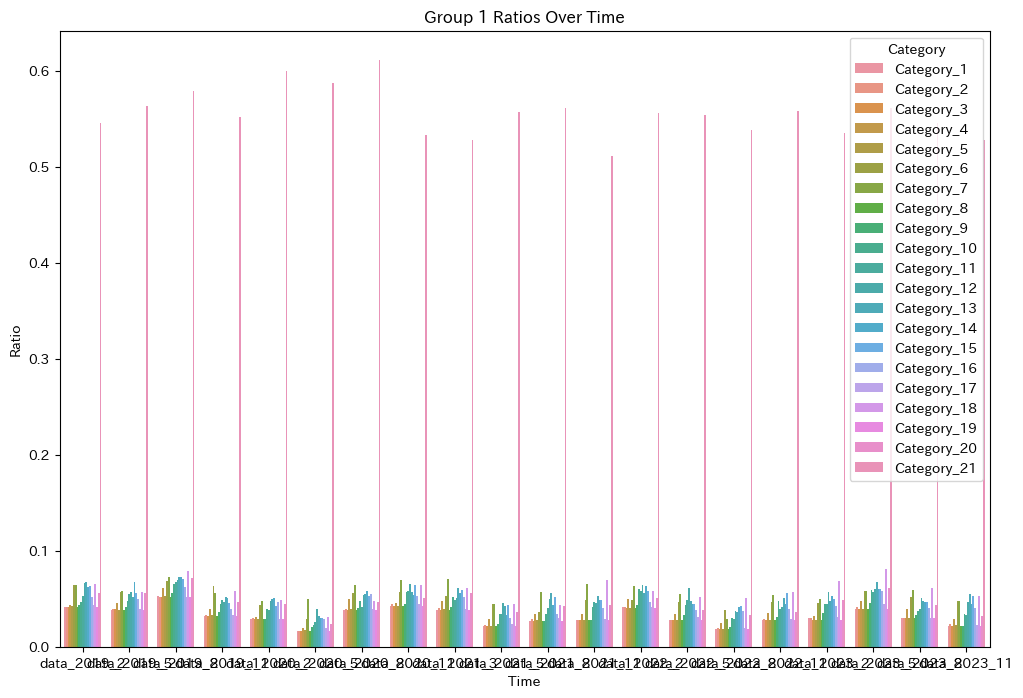

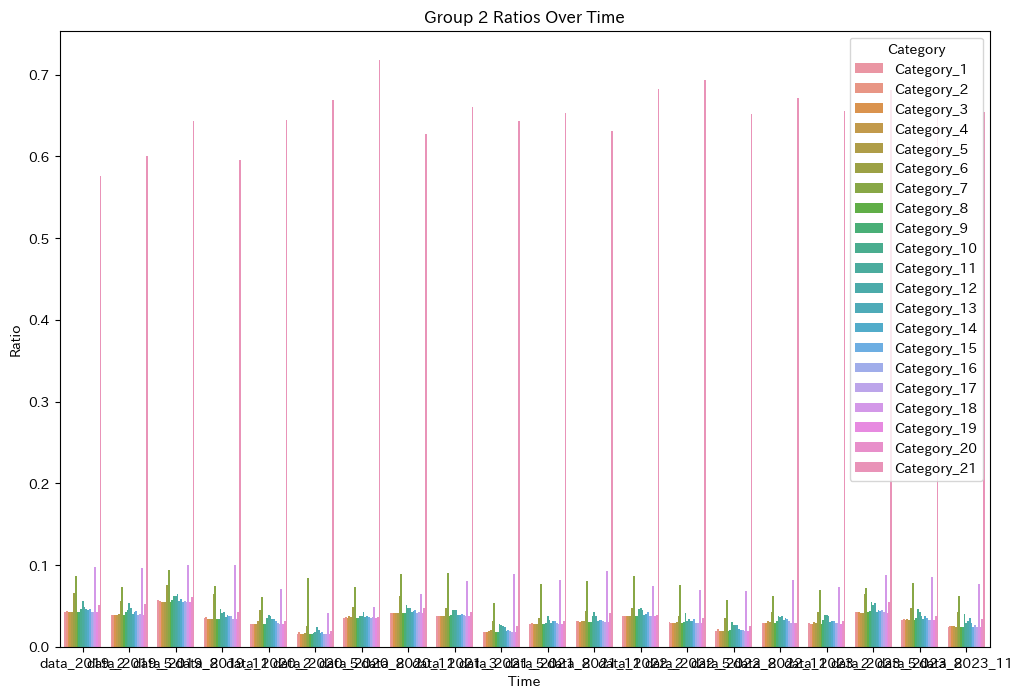

In [14]:
# データを整形
data = []
Category = ['一次活動', '二次活動', '三次活動', '活動なし']
for key, values in ratios_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            data.append({'Time': key, 'Group': f'Group_{i+1}', 'Category': f'Category_{j+1}', 'Ratio': ratio})

# データフレームに変換
df = pd.DataFrame(data)

# グラフを描画
plt.figure(figsize=(12, 8))
sns.barplot(x='Time', y='Ratio', hue='Category', data=df[df['Group'] == 'Group_1'])
plt.title('Group 1 Ratios Over Time')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Time', y='Ratio', hue='Category', data=df[df['Group'] == 'Group_2'])
plt.title('Group 2 Ratios Over Time')
plt.show()

In [15]:
df

,Time,Group,Category,Ratio
0,data_2019_2,Group_1,Category_1,0.041
1,data_2019_2,Group_1,Category_2,0.041
2,data_2019_2,Group_1,Category_3,0.041
3,data_2019_2,Group_1,Category_4,0.043
4,data_2019_2,Group_1,Category_5,0.042
...,...,...,...,...
2935,data_2023_11,Group_7,Category_17,0.024
2936,data_2023_11,Group_7,Category_18,0.026
2937,data_2023_11,Group_7,Category_19,0.024
2938,data_2023_11,Group_7,Category_20,0.028


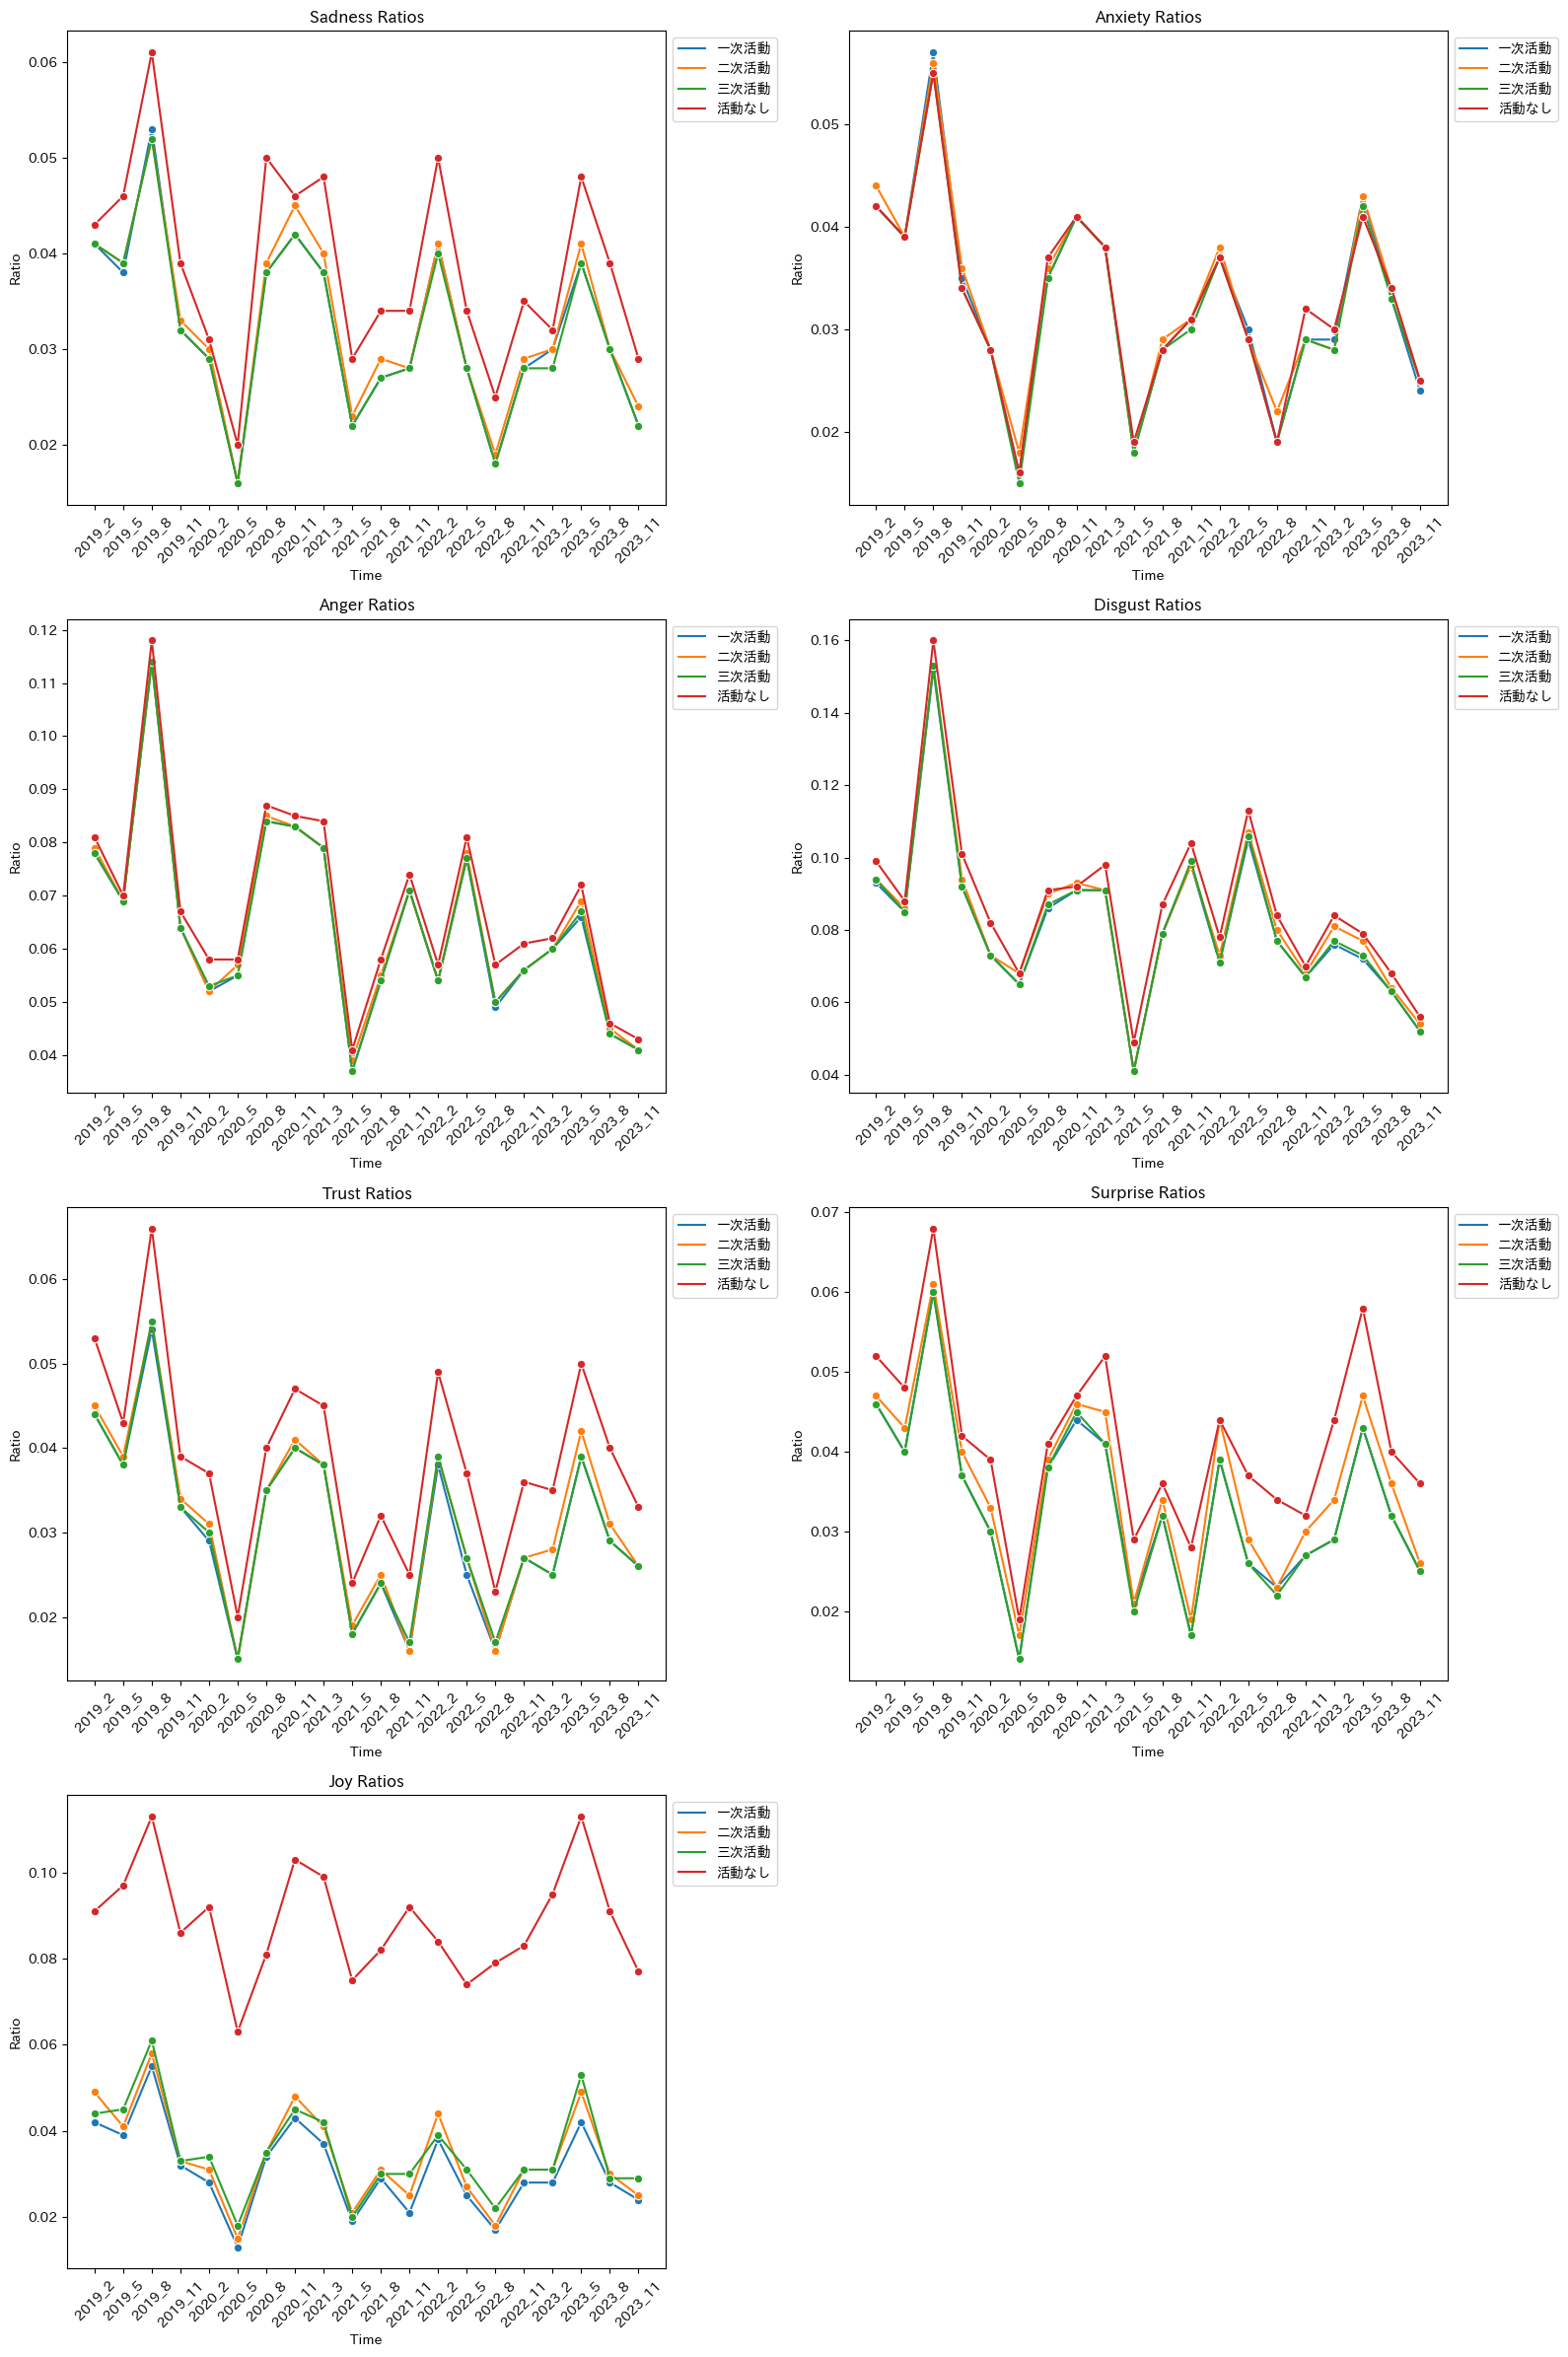

In [16]:
# データを整形
data = []
Groups = ['Sadness', 'Anxiety', 'Anger', 'Disgust', 'Trust', 'Surprise', 'Joy']
categories = ['一次活動', '二次活動', '三次活動', '活動なし']
for key, values in ratios_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            if j < len(categories):  # カテゴリの数を超えないようにする
                data.append({'Time': key[5:], 'Group': Groups[i], 'Category': categories[j], 'Ratio': ratio})

# データフレームに変換
df = pd.DataFrame(data)

# サブプロットの設定
fig, axes = plt.subplots(4, 2, figsize=(16, 24))  # 4行2列のサブプロットを作成
axes = axes.flatten()  # 2次元配列を1次元に変換

# 各感情カテゴリのグラフを描画
for i, group in enumerate(Groups):
    sns.lineplot(ax=axes[i], x='Time', y='Ratio', hue='Category', data=df[df['Group'] == group], marker="o")
    axes[i].set_title(f'{group} Ratios')
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i].tick_params(axis='x', rotation=45)  # x軸ラベルを45度回転

# 余分なサブプロットを削除
for j in range(len(Groups), len(axes)):
    fig.delaxes(axes[j])

# レイアウトの調整
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


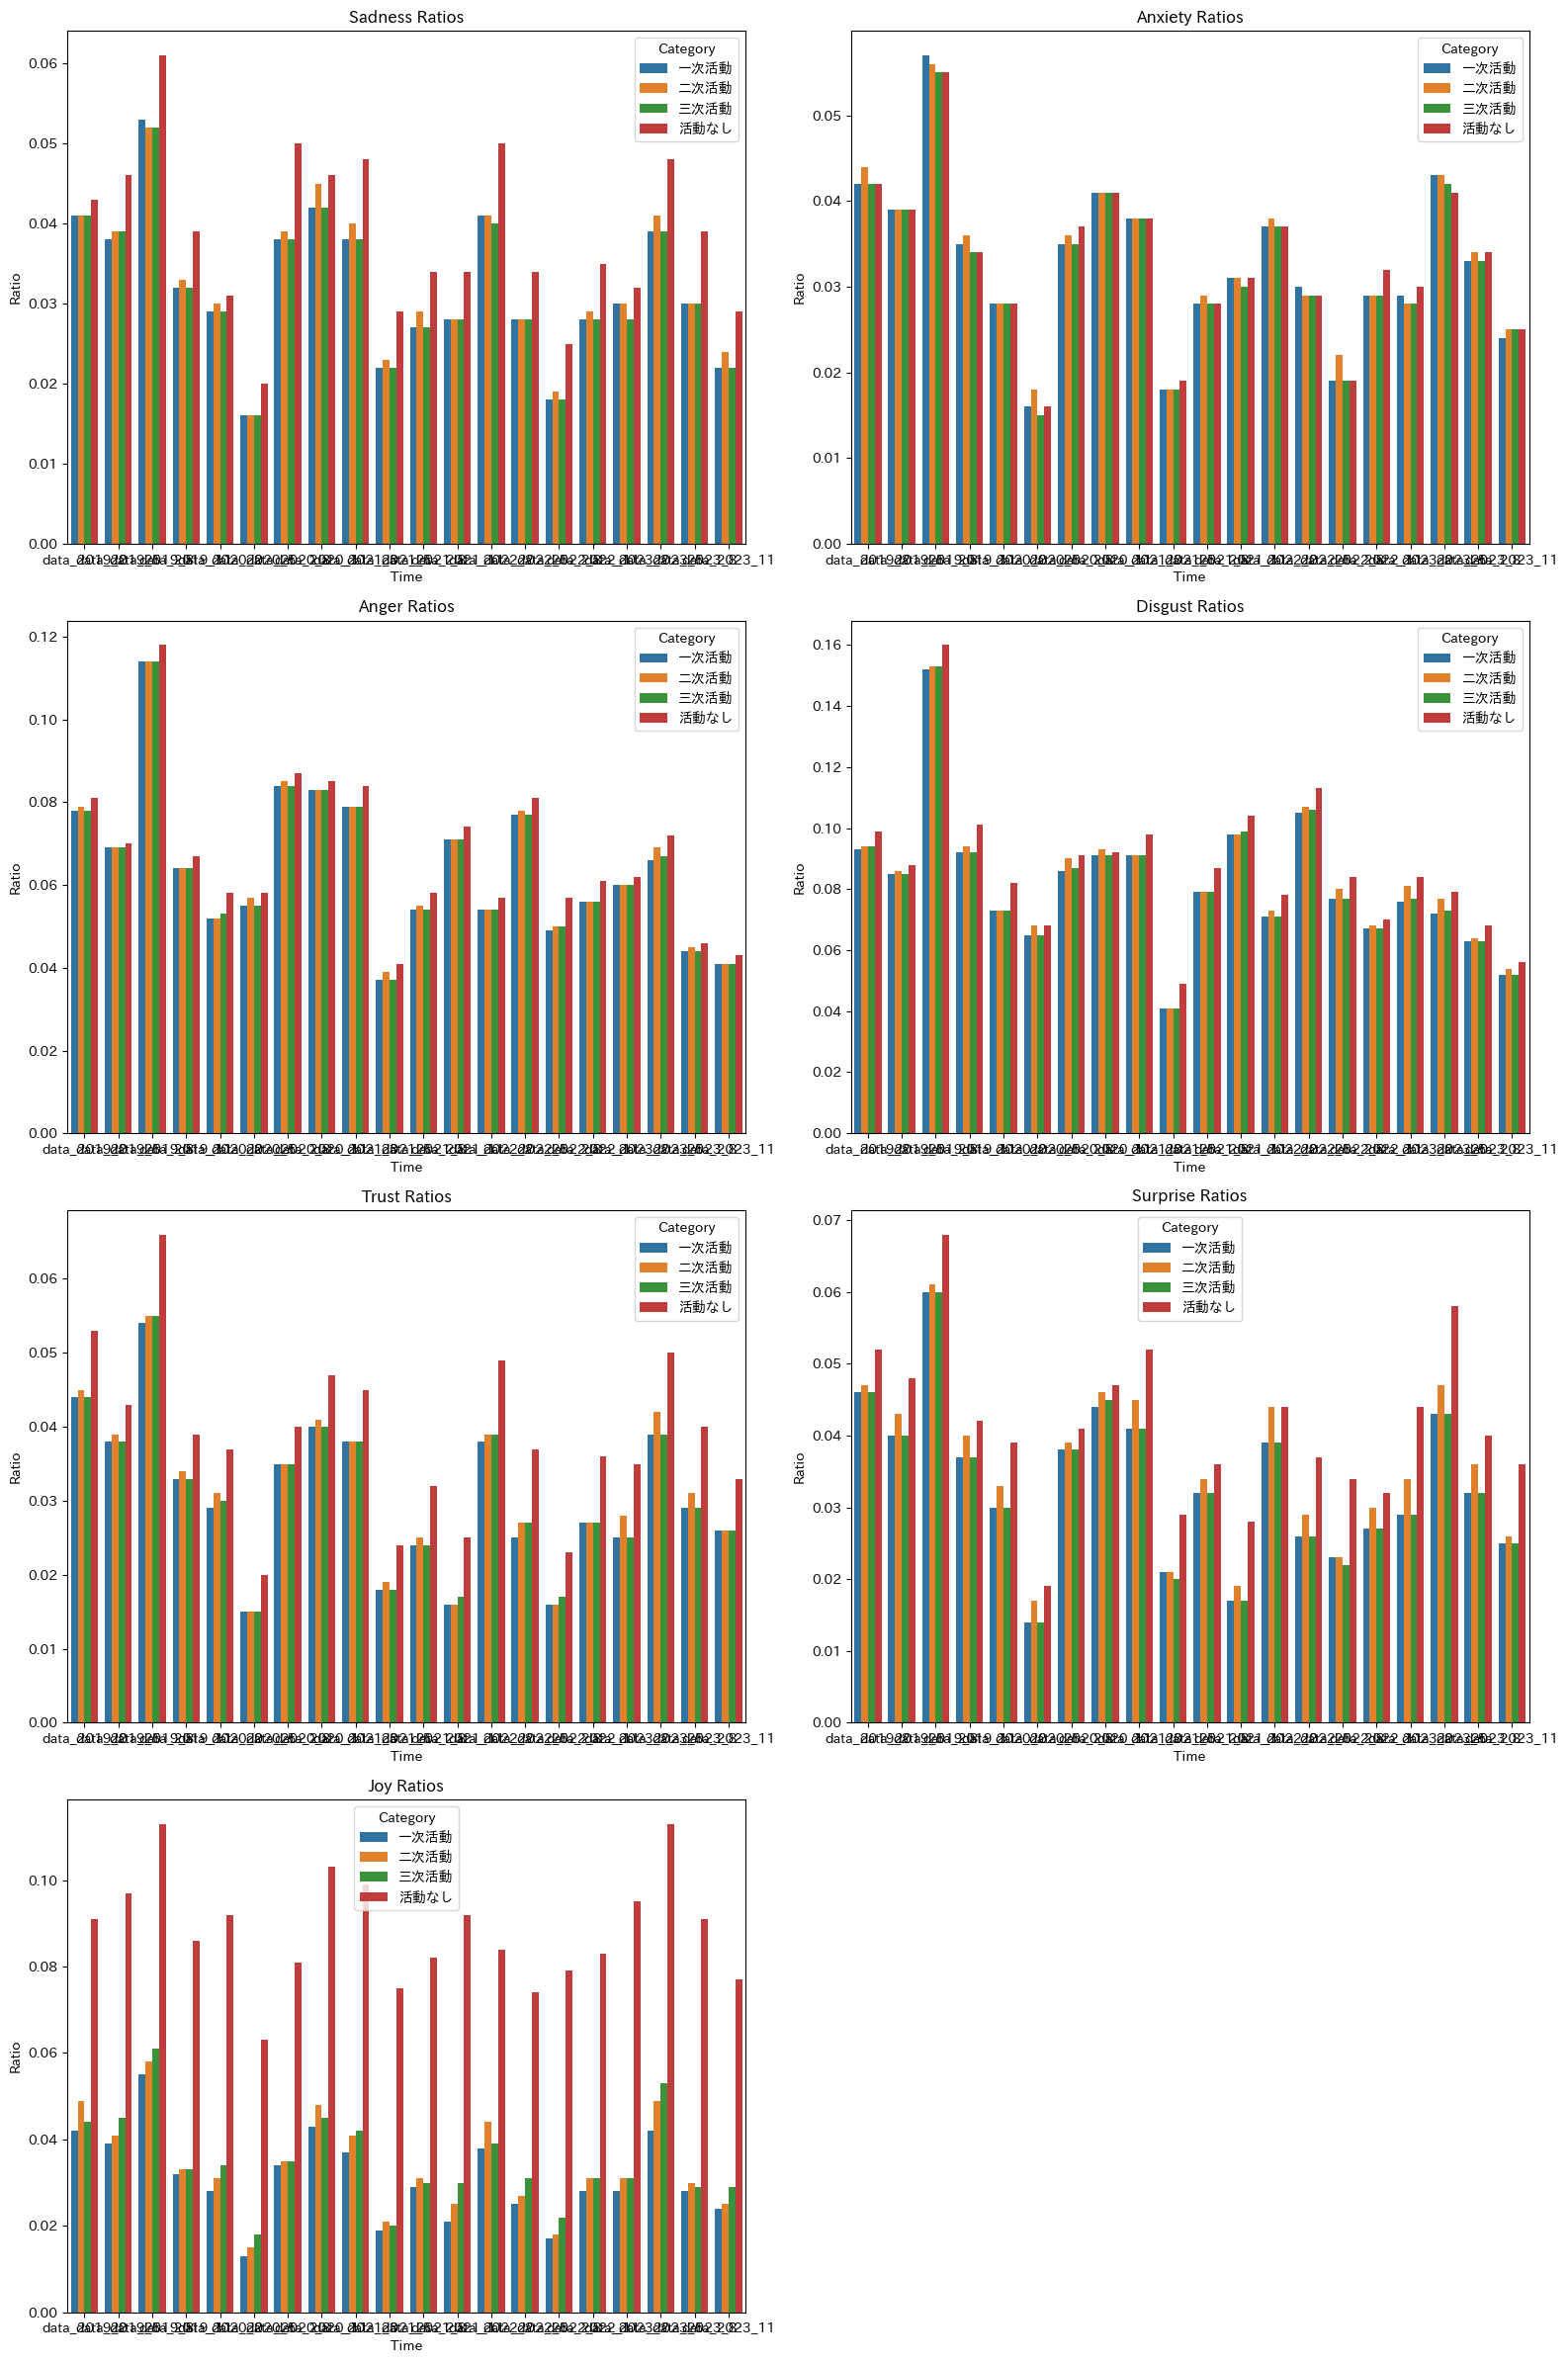

In [17]:
# 感情カテゴリのリスト
Groups = ['Sadness', 'Anxiety', 'Anger', 'Disgust', 'Trust', 'Surprise', 'Joy']
categories = ['一次活動', '二次活動', '三次活動', '活動なし']

# データを整形
data = []
for key, values in ratios_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            if j < len(categories):  # カテゴリの数を超えないようにする
                data.append({'Time': key, 'Group': Groups[i], 'Category': categories[j], 'Ratio': ratio})

# データフレームに変換
df = pd.DataFrame(data)

# サブプロットの設定
fig, axes = plt.subplots(4, 2, figsize=(16, 24))  # 4行2列のサブプロットを作成
axes = axes.flatten()  # 2次元配列を1次元に変換

# 各感情カテゴリのグラフを描画
for i, group in enumerate(Groups):
    sns.barplot(ax=axes[i], x='Time', y='Ratio', hue='Category', data=df[df['Group'] == group])
    axes[i].set_title(f'{group} Ratios')
    
# 凡例を図の外に表示
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 余分なサブプロットを削除
for j in range(len(Groups), len(axes)):
    fig.delaxes(axes[j])

# レイアウトの調整
plt.tight_layout()
plt.show()

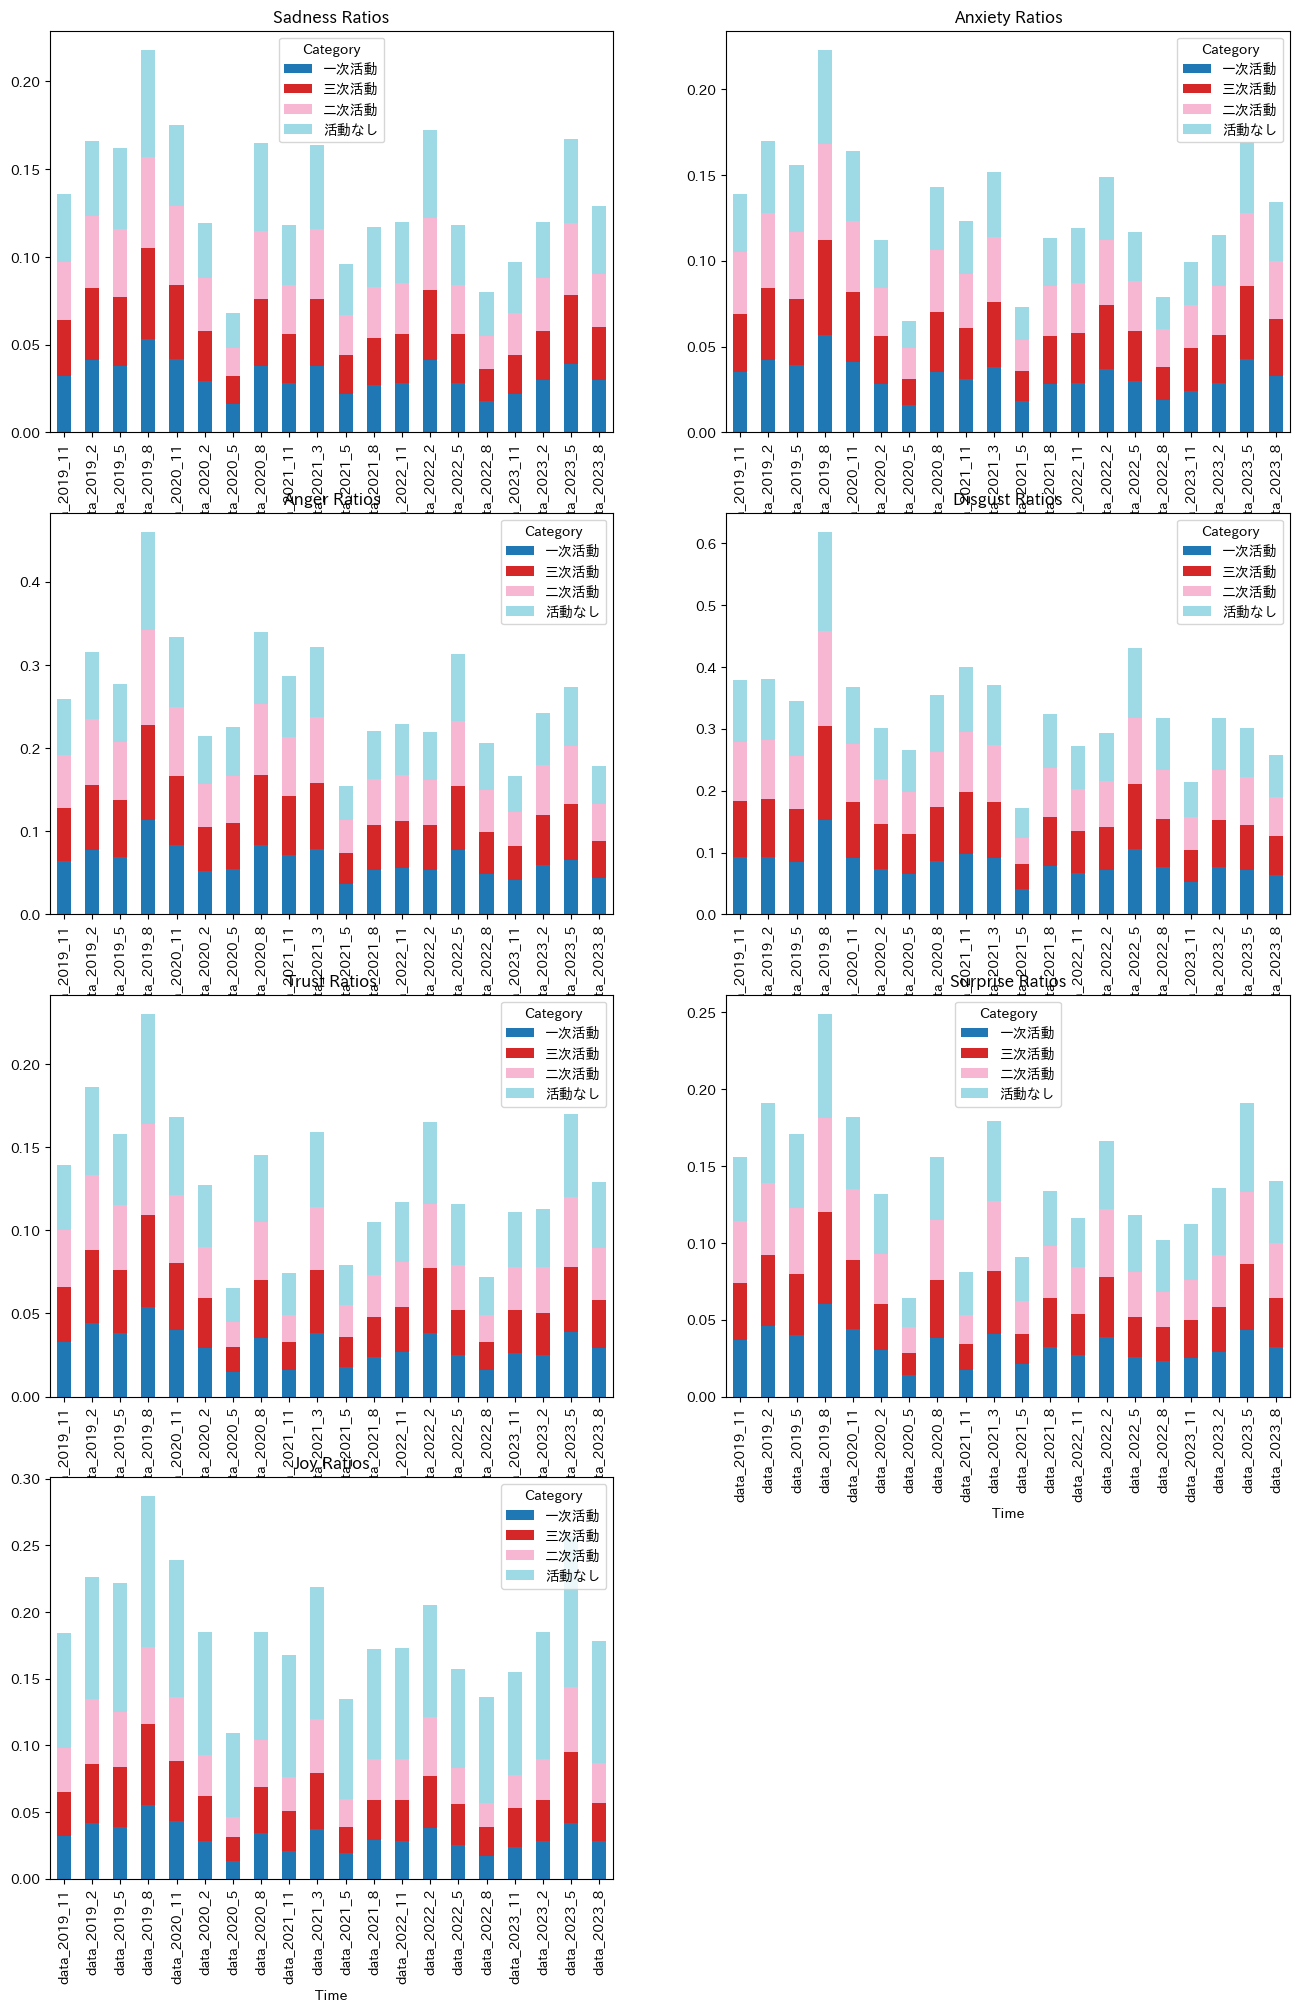

In [18]:
# サブプロットの設定
fig, axes = plt.subplots(4, 2, figsize=(16, 24))  # 4行2列のサブプロットを作成
axes = axes.flatten()  # 2次元配列を1次元に変換

# 各感情カテゴリの積み上げ棒グラフを描画
for i, group in enumerate(Groups):
    subset = df[df['Group'] == group]
    pivot_df = subset.pivot_table(index='Time', columns='Category', values='Ratio', aggfunc='sum').fillna(0)
    pivot_df.plot(kind='bar', stacked=True, ax=axes[i], colormap='tab20')
    axes[i].set_title(f'{group} Ratios')

# 余分なサブプロットを削除
for j in range(len(Groups), len(axes)):
    fig.delaxes(axes[j])

In [19]:
# データをフラット化してPandasのDataFrameに変換
data_list = []
for label, predictions in predictions_dict.items():
    for time_idx, prediction in enumerate(predictions):
        for class_idx, value in enumerate(prediction):
            data_list.append([label, time_idx, f'Class {class_idx+1}', value])

df = pd.DataFrame(data_list, columns=['Dataset', 'Time', 'Class', 'Ratio'])

# Seabornを使って棒グラフを作成
g = sns.catplot(
    data=df, kind='bar',
    x='Time', y='Ratio', hue='Class', col='Dataset',
    ci=None, palette='muted', height=4, aspect=1
)

g.set_titles("{col_name}")
g.set_axis_labels("Time", "Ratio")
g.set(ylim=(0, 1))
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

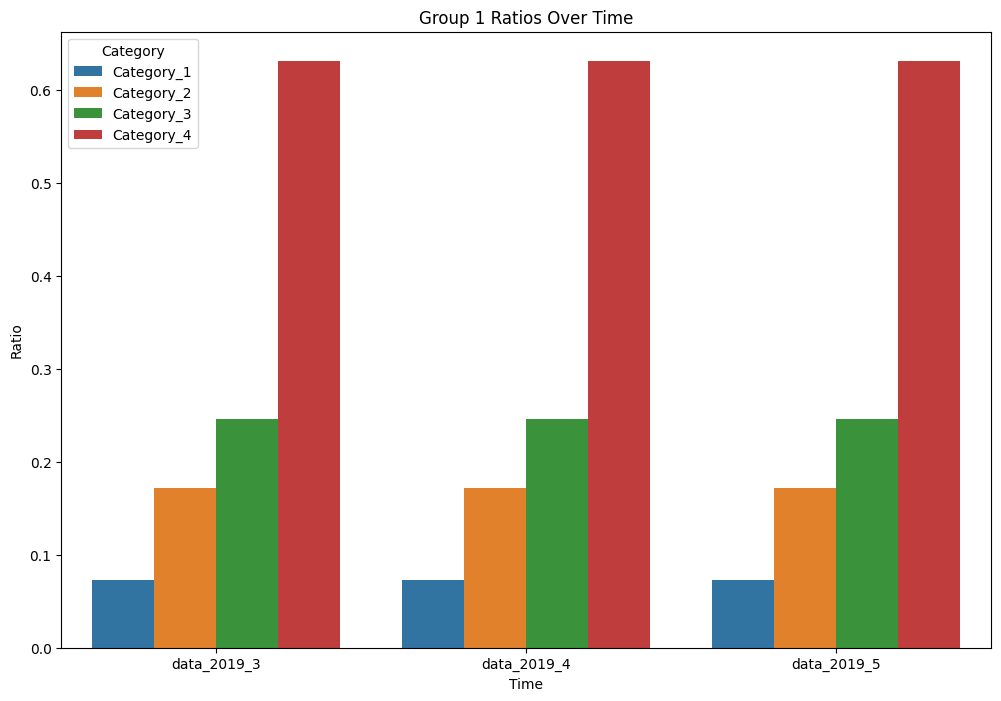

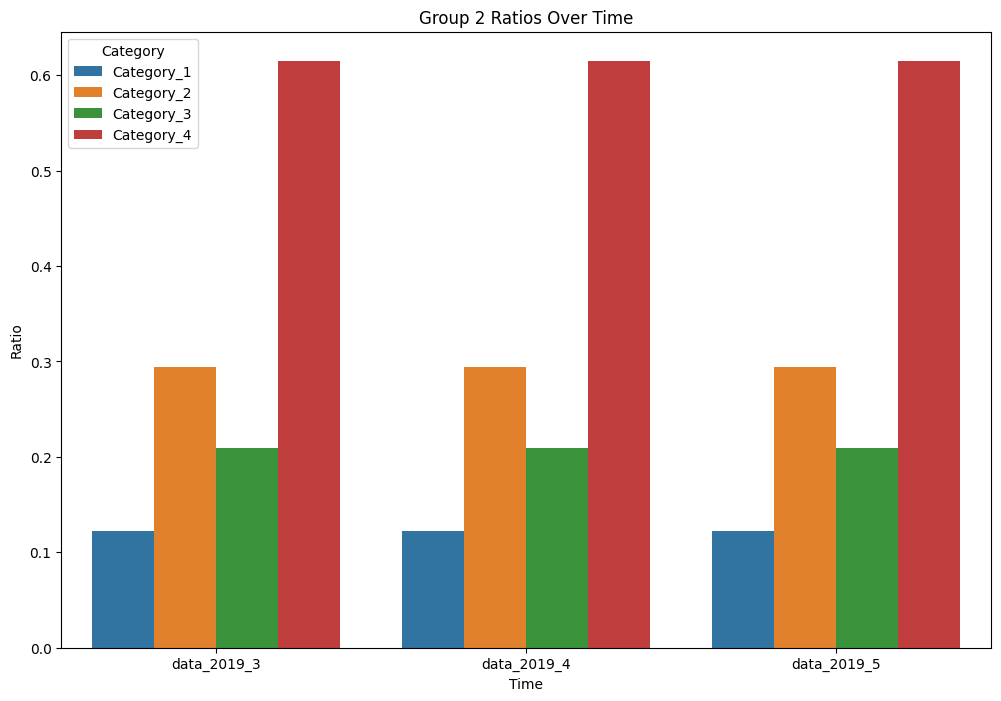

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 提供されたデータ
ratios_dict = {
    'data_2019_3': [np.array([0.073, 0.172, 0.246, 0.631], dtype=np.float32),
                    np.array([0.122, 0.294, 0.209, 0.615], dtype=np.float32)],
    'data_2019_4': [np.array([0.073, 0.172, 0.246, 0.631], dtype=np.float32),
                    np.array([0.122, 0.294, 0.209, 0.615], dtype=np.float32)],
    'data_2019_5': [np.array([0.073, 0.172, 0.246, 0.631], dtype=np.float32),
                    np.array([0.122, 0.294, 0.209, 0.615], dtype=np.float32)]
}

# データを整形
data = []
for key, values in ratios_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            data.append({'Time': key, 'Group': f'Group_{i+1}', 'Category': f'Category_{j+1}', 'Ratio': ratio})

# データフレームに変換
df = pd.DataFrame(data)

# グラフを描画
plt.figure(figsize=(12, 8))
sns.barplot(x='Time', y='Ratio', hue='Category', data=df[df['Group'] == 'Group_1'])
plt.title('Group 1 Ratios Over Time')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Time', y='Ratio', hue='Category', data=df[df['Group'] == 'Group_2'])
plt.title('Group 2 Ratios Over Time')
plt.show()

#### 21class分類モデルでの予測

In [6]:
### Trainer取得
# 使用モデルの読み込み
# 最初の分析の時のモデル
# model = AutoModelForSequenceClassification.from_pretrained('/home/is/akiyoshi-n/my-project/outputs/2024-08-20/cl-tohoku/bert-base-japanese-v3/2024-08-20T15-40-08/checkpoint-1806')
model = AutoModelForSequenceClassification.from_pretrained('/home/is/akiyoshi-n/my-project/outputs/2024-09-08/cl-tohoku/bert-base-japanese-v3/2024-09-08T15-27-02/checkpoint-1743')
trainer = MultilabelTrainer(model = model)

In [7]:
# 東北大BERT-v3
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'
Classifier_model = MultiClassClassifier(model_name=MODEL_NAME, num_labels=21, seed=SEED, thresh=THRESH)

In [21]:
# 予測結果を保存する辞書
predictions_dict_21 = {}
data_labels = ['data_2019_2', 'data_2019_5', 'data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8', 'data_2020_11', 'data_2021_3', 'data_2021_5', 'data_2021_8', 'data_2021_11', 'data_2022_2', 'data_2022_5', 'data_2022_8', 'data_2022_11', 'data_2023_2', 'data_2023_5', 'data_2023_8', 'data_2023_11']
for label, dataset in zip(data_labels, data_list):
    predictions_dict_21[label] = []
    for i in range(7):
        prediction = Classifier_model.predict(trainer, dataset[i], MAX_LEN)
        # 予測結果を保存
        predictions_dict_21[label].append(prediction)

Parameter 'fn_kwargs'={'tokenizer': BertJapaneseTokenizer(name_or_path='cl-tohoku/bert-base-japanese-v3', vocab_size=32768, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, 'max_len': 128} of the transform datasets.arrow_dataset.Dataset._map_single cou

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [23]:
# # pickle形式で保存
# import pickle
# with open(f'{DATASET_PATH}/downloaded_files/21class_predictions_dict_all_year_0raw_ari_new.pkl', 'wb') as f:
#     pickle.dump(predictions_dict_21, f)

### 21クラス分析

In [20]:
# pickle形式で読み込み
import pickle
# with open(f'{DATASET_PATH}/downloaded_files/21class_predictions_dict_all_year_0raw_ari.pkl', 'rb') as f:
#     predictions_dict = pickle.load(f)
with open(f'{DATASET_PATH}/downloaded_files/21class_predictions_dict_all_year_0raw_ari_new.pkl', 'rb') as f:
    predictions_dict = pickle.load(f)

In [21]:
len(predictions_dict['data_2019_2'])

7

In [22]:
texts = globals().get('data_2020_5')
text = texts[6]['texts']

In [23]:
# textの中の文字列の中のnanの列番号を取得
nan_indices = []
for i, t in enumerate(text):
    if isinstance(t, float) and np.isnan(t):
        nan_indices.append(i)
nan_indices

[31, 93, 156, 177, 223, 261, 392, 442, 503, 504, 652, 694, 987]

In [24]:
print(text[30:35])
print(predictions_dict['data_2020_5'][6][30:35])

['トレーニングが楽しい。', nan, '再放送のドラマを見た', '新車の運転', '最近は楽しい事はない、コロナ禍では特に。']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [25]:
# テキストからnanを削除したテキストデータと，削除後の予測結果を取得
data_labels = ['data_2019_2', 'data_2019_5', 'data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8', 'data_2020_11', 'data_2021_3', 'data_2021_5', 'data_2021_8', 'data_2021_11', 'data_2022_2', 'data_2022_5', 'data_2022_8', 'data_2022_11', 'data_2023_2', 'data_2023_5', 'data_2023_8', 'data_2023_11']
for label in data_labels:
    texts = globals().get(label)
    for i in range(7):
        # nanに対応するインデックスを取得
        nan_indices = [index for index, t in enumerate(texts[i]['texts']) if t is np.nan or pd.isna(t)]
        
        # nanを含む要素を削除
        texts[i]['texts'] = [t for j, t in enumerate(texts[i]['texts']) if j not in nan_indices]
        
        # nanに対応する予測結果も削除
        predictions_dict[label][i] = np.delete(predictions_dict[label][i], nan_indices, axis=0)


In [26]:
# 確かにデータ数が減っている
text = data_2020_5[6]['texts']
print(text[30:35])
print(predictions_dict['data_2020_5'][6][30:35])

['トレーニングが楽しい。', '再放送のドラマを見た', '新車の運転', '最近は楽しい事はない、コロナ禍では特に。', '趣味をしているときが楽しい']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [27]:
# nan削除後の各行動のデータ数
print(len(predictions_dict['data_2020_5'][6]))
print(np.sum(predictions_dict['data_2020_5'][6], axis=0))

987
[  0.   0.   6.  39.   0.   7.   4.   0.   7.   0.  29.  72.  29.  56.
  87.  46.  11.   2.   0.   4. 206.]


In [28]:
import numpy as np

# 変数の準備
data = predictions_dict['data_2021_3'][6]  # 1000行21列のnp.ndarray
texts = data_2021_3[6]['texts']  # 1000個のテキスト
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# 各カテゴリごとに1のインデックスを格納する辞書
indices_dict = {}

# 各列ごとに1のインデックスを取得
for col, category in enumerate(categories):
    indices = np.where(data[:, col] == 1)[0]  # 列における1のインデックスを取得
    indices_dict[category] = indices

# 結果の表示
for category, indices in indices_dict.items():
    print(f"Category: {category}")
    for indice in indices:
        print(f'-{texts[indice]}')
    print("\n")


Category: 睡眠
-休みの日にいつまでも寝ていられること。


Category: 身の回りの用事


Category: 食事-飲酒あり
-お酒を沢山のんだ
-お酒を飲んで友人と話をして楽しかった。
-お酒飲む時間
-お酒を飲むこと
-友達とお酒を飲んでいて楽しかった
-ひさしぶりにお酒を飲んで楽しい
-お酒を後輩と飲んでとても楽しかった
-仲良しの人とお酒を飲んで楽しかった
-宅飲みで集まれたこと


Category: 食事-飲酒なし・不明
-上の階の方と夕飯を一緒に食べる事
-正月に娘が戻ってきて、一緒に買い物したり、美味しいものを食べたりした。
-久々にご飯いっぱい食べた
-久しぶりに家族で外食に出かけて楽しかった。
-おいしいものを食べて楽しい
-今日はおいしいオムライスができたこと。##昨日はとてもおいしい中華丼ぶりができた。##その前の日はとても美味しいソーメンチャンプルーができたこと。##更にその前の日はおいしいおでんに感激した。これらのおいしい食事が楽しいこと。
-美味しい焼肉が食べれた
-夜ごはんにつくった料理がおいしかった。
-おいしいものを食べるのが楽しい
-食事をするのがとても楽しかった
-食べ放題チャレンジが楽しい
-美味しい物を食べてる時。
-娘の誕生日に、久しぶりに家族みんなで勢揃いし、お祝いの食事をして、楽しいひと時を過ごした。
-おいしいものを食べた
-美味しい物を食べた時。
-カフェで美味しいコーヒーを飲んだこと
-外食自粛は続いているが、家で家族で夕飯に手巻き寿司や焼肉パーティなどをやることが何より楽しい。
-家族で食事できて楽しい
-家で一人焼肉をした時
-家族との団らんが有り、色々な話を行い。楽しい会話であった。
-最近はおいしいお菓子を食べることに楽しみを覚えます。
-家族で食事に行ったとき。
-今日職場の人がケーキを買ってきてくれ、こっそりみんなで食べた。とてもおいしかったし、楽しかった
-夫の友人が家に遊びに来てくれました。餃子を手作りで振る舞って、喜んで食べていただきました。夫以外の人と会話するのを楽しいと感じたのは久しぶりの出来事でした。
-家族と食事してる時
-美味しいラーメン屋で外食
-こもりがちだった義理の弟と、久しぶりに外食に行き、笑顔が見られたので楽しかった。
-美味しい料理を食べた
-友達と

In [29]:
# nan削除後の各行動のデータ数
print(len(predictions_dict['data_2020_5'][2]))
print(np.sum(predictions_dict['data_2020_5'][2], axis=0))

945
[  1.   0.   0.   1.   0.  10.  18.   0.   5.   2.   9.   8.  24.   2.
   0.   9.   1.   3.   0.   0. 651.]


In [30]:
import numpy as np

# 変数の準備
data = predictions_dict['data_2022_5'][0]  # 1000行21列のnp.ndarray
texts = data_2022_5[0]['texts']  # 1000個のテキスト
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# 各カテゴリごとに1のインデックスを格納する辞書
indices_dict = {}

# 各列ごとに1のインデックスを取得
for col, category in enumerate(categories):
    indices = np.where(data[:, col] == 1)[0]  # 列における1のインデックスを取得
    indices_dict[category] = indices

# 結果の表示
for category, indices in indices_dict.items():
    print(f"Category: {category}")
    for indice in indices:
        print(f'-{texts[indice]}')
    print("\n")


Category: 睡眠


Category: 身の回りの用事


Category: 食事-飲酒あり
-何か特別なときがあったとき用に取っていたワインが価値を知らない妻が勝手に飲んでた。


Category: 食事-飲酒なし・不明
-焼き肉が食べたかった
-頂き物のビールがあって、##主人が６本頂いたのだけど、##主人が1本だけ分けてくれたけど、##本当はもっと飲みたかった。なので悲しかった。
-寿司を食べに行った時、サーモンがなかったこと


Category: 通勤・通学


Category: その他の移動
-昨日実家に帰ったら飼い犬が寝そべっていた##何も食べていないらしい##近寄っても反応はなくかろうじて呼吸が確認できる##多分次に帰るときはいないと思う
-久しぶりの外出の機会を得てこれまで気になっていた博物館に出かけたが、予約制になっていて入れず、入れなかったことと事前に良く調べなかった自分の失敗に対して大変悲しい思いをした。
-ゴールデンウィークに１日は、遠出をしたかったのに、パートナーの都合でできなかった
-自転車で転倒した
-GWに沖縄に行ったのだけど、高速船が止まるかもと１日早く帰ったら、止まらなかった。
-一階で忘れ物をして二階に上がったら、何を取りに上がったか忘れた。
-電車内で混み合っている時に、少し荷物が当たっただけで、イラついている人が何人もいた様子を見て、そう思いました。
-今まで軽く越せた段差につまずいて転んだこと。
-友達にドタキャンされた。体調不良だから仕方がないが、改札を出てから連絡が来たので往復の電車賃を損した。
-出掛けようとした日が雨


Category: 仕事
-ヤフークラウドソーシングで利用制限された
-ゴールデンウイークに仕事をしたこと。
-外仕事なので最近雨が多いこと
-GWが終わってしまい、仕事が始まってしまったこと
-仕事でうまくいかなかった
-仕事先の人間と上手くコミュニケーションが取れなかった。ある程度シミュレーションしていたが空振りに終わった。
-仕事の時間数を減らされ悲しい思いをした。
-体調不良があって働くことが出来ない
-仕事量が、日々大きくなって終わらない
-一生懸命、仕事を頑張ってしているのに、認められずに、ないがしろにされている事。
-クラウドソーシングサイトで単価の高い仕事ができな

In [31]:
# 各データセットとインデックスの組み合わせで割合を保存
ratios_dict = {}
counts_dict = {}
data_labels = ['data_2019_2', 'data_2019_5', 'data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8', 'data_2020_11', 'data_2021_3', 'data_2021_5', 'data_2021_8', 'data_2021_11', 'data_2022_2', 'data_2022_5', 'data_2022_8', 'data_2022_11', 'data_2023_2', 'data_2023_5', 'data_2023_8', 'data_2023_11']
for label in data_labels:
    ratios_dict[label] = []
    counts_dict[label] = []
    # 文字列を変数に変換
    texts = globals().get(label)
    for i in range(7):
        # 文章を取得
        text = texts[i]['texts']
        column_sums = np.sum(predictions_dict[label][i], axis=0)  # 各列の合計を計算
        length = len(predictions_dict[label][i])
        column_ratios = column_sums / length    # 各列の割合を計算
        ratios_dict[label].append(column_ratios)
        counts_dict[label].append(column_sums)

In [32]:
counts_dict['data_2020_5']

[array([  0.,   0.,   0.,   0.,   0.,  10.,  18.,   0.,   6.,   5.,   6.,
         16.,  20.,   4.,   6.,  15.,   2.,   5.,   0.,   7., 656.],
       dtype=float32),
 array([  4.,   0.,   0.,   0.,   2.,   6.,  27.,   0.,   1.,   4.,   2.,
          8.,   6.,   1.,   0.,   0.,   0.,  25.,   0.,   1., 642.],
       dtype=float32),
 array([  1.,   0.,   0.,   1.,   0.,  10.,  18.,   0.,   5.,   2.,   9.,
          8.,  24.,   2.,   0.,   9.,   1.,   3.,   0.,   0., 651.],
       dtype=float32),
 array([  0.,   0.,   0.,   0.,   0.,  13.,   7.,   0.,   4.,   0.,   1.,
         22.,  20.,   0.,   1.,  12.,   1.,   1.,   0.,   0., 645.],
       dtype=float32),
 array([  0.,   0.,   0.,   1.,   0.,   1.,  37.,   0.,   0.,   1.,   4.,
         14.,  11.,   0.,   1.,  31.,  13.,   7.,   0.,   5., 541.],
       dtype=float32),
 array([  0.,   0.,   0.,   2.,   0.,  10.,   1.,   0.,   5.,   2.,   6.,
         19.,  16.,   6.,   6.,   5.,   1.,   0.,   0.,   1., 655.],
       dtype=float32),
 arr

In [33]:
# データを整形
data = []
Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']
for key, values in ratios_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            data.append({'Time': key[5:], 'Group': f'Group_{i+1}', 'Category': f'{Category[j]}', 'Ratio': ratio})

# データフレームに変換
df = pd.DataFrame(data)

In [34]:
# データを整形
data = []
Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']
for key, values in counts_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            data.append({'Time': key[5:], 'Group': f'Group_{i+1}', 'Category': f'{Category[j]}', 'Ratio': ratio})

# データフレームに変換
df_counts = pd.DataFrame(data)

In [35]:
df

,Time,Group,Category,Ratio
0,2019_2,Group_1,睡眠,0.001043
1,2019_2,Group_1,身の回りの用事,0.000000
2,2019_2,Group_1,食事-飲酒あり,0.000000
3,2019_2,Group_1,食事-飲酒なし・不明,0.001043
4,2019_2,Group_1,通勤・通学,0.001043
...,...,...,...,...
2935,2023_11,Group_7,交際-オンライン的接触,0.002049
2936,2023_11,Group_7,受診・療養,0.000000
2937,2023_11,Group_7,喫煙,0.000000
2938,2023_11,Group_7,その他の行動,0.004098


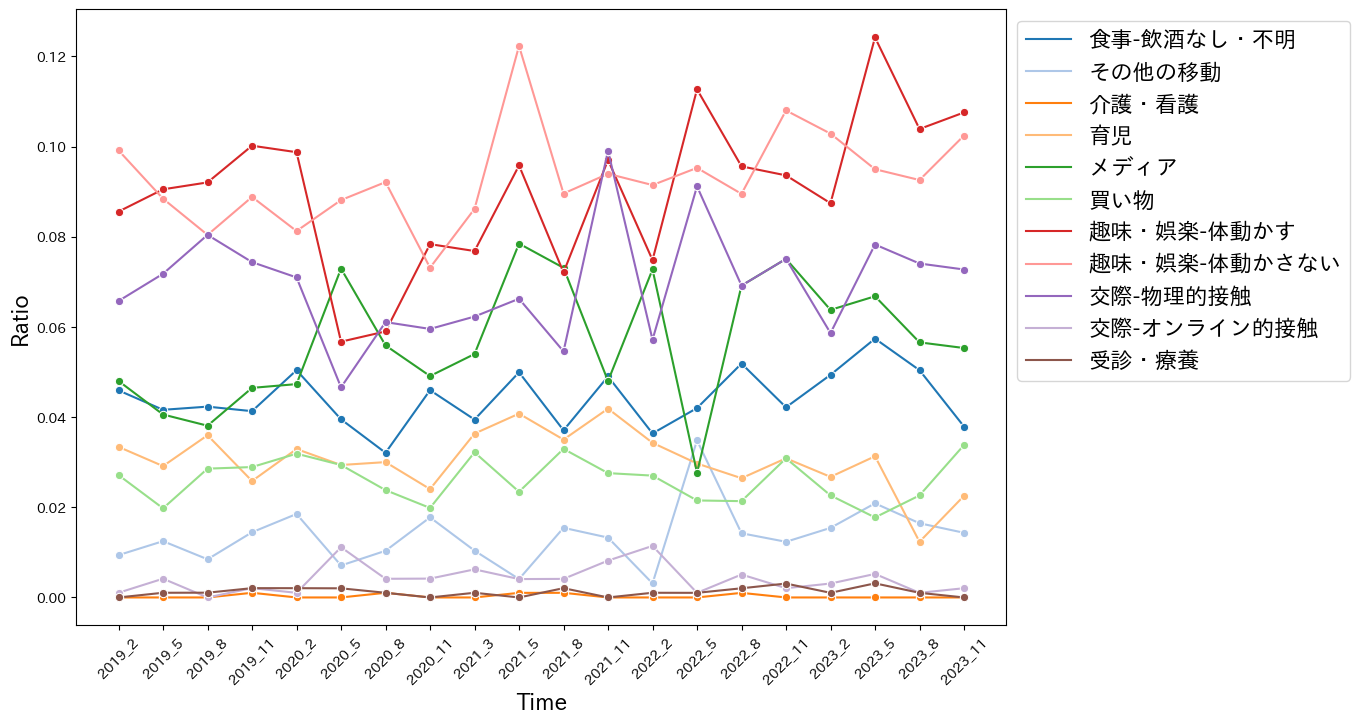

In [38]:
Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

new_Category = ['食事-飲酒なし・不明', 'その他の移動','介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養']

# Group1を時系列で可視化
# Joy Ratioのグラフを描画
plt.figure(figsize=(12, 8))

# 使用するカラーパレットを指定
palette = sns.color_palette("tab20", n_colors=len(new_Category))

# Groups = ['Sadness', 'Anxiety', 'Anger', 'Disgust', 'Trust', 'Surprise', 'Joy']

# new_Categoryに該当するデータのみをフィルタリング
filtered_df = df[(df['Group'] == 'Group_7') & (df['Category'].isin(new_Category))]

# 折れ線グラフを描画
sns.lineplot(x='Time', y='Ratio', hue='Category', data=filtered_df, marker="o", palette=palette)
# グラフタイトルを設定
# plt.title('Joy Ratios', fontsize=20)

# x軸とy軸のラベルの文字サイズを設定
plt.xlabel('Time', fontsize=16)
plt.ylabel('Ratio', fontsize=16)

# 凡例を図の外に表示
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 16})

# 凡例をグラフの上に表示
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.21), ncol=3, prop={'size': 13})

# x軸のラベルを45度回転
plt.xticks(rotation=45)

plt.show()

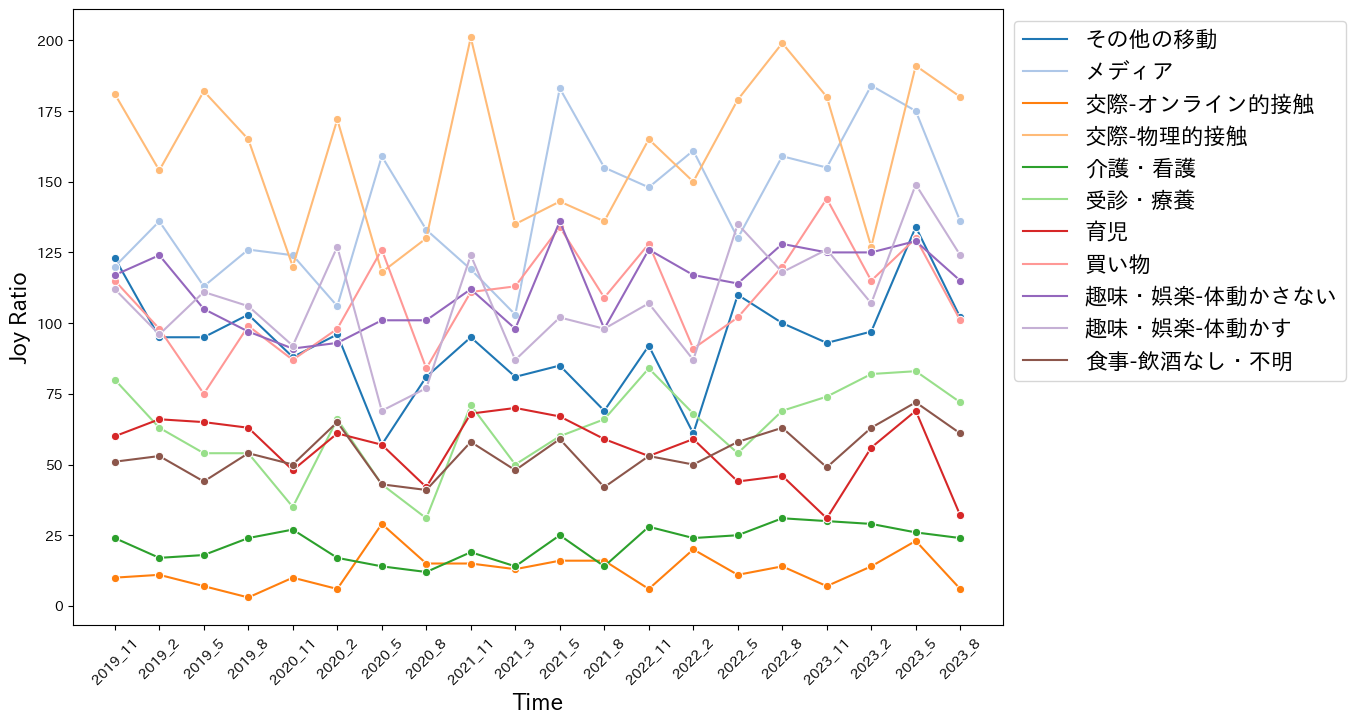

In [31]:
Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

new_Category = ['食事-飲酒なし・不明', 'その他の移動','介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養']

# Group1を時系列で可視化
# Joy Ratioのグラフを描画
plt.figure(figsize=(12, 8))

# 使用するカラーパレットを指定
palette = sns.color_palette("tab20", n_colors=len(new_Category))

# Groups = ['Sadness', 'Anxiety', 'Anger', 'Disgust', 'Trust', 'Surprise', 'Joy']

# new_Categoryに該当するデータのみをフィルタリング
filtered_df_counts = df_counts[(df_counts['Category'].isin(new_Category))]

# Group1~Group7のRatioの列を合計する．Timeで昇順に並べる
filtered_df_counts = filtered_df_counts.groupby(['Time', 'Category']).sum().reset_index()

# 折れ線グラフを描画
sns.lineplot(x='Time', y='Ratio', hue='Category', data=filtered_df_counts, marker="o", palette=palette)
# グラフタイトルを設定
# plt.title('Joy Ratios', fontsize=20)

# x軸とy軸のラベルの文字サイズを設定
plt.xlabel('Time', fontsize=16)
plt.ylabel('Joy Ratio', fontsize=16)

# 凡例を図の外に表示
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 16})

# x軸のラベルを45度回転
plt.xticks(rotation=45)

plt.show()

In [25]:
filtered_df_counts

,Time,Category,Group,Ratio
0,2019_11,その他の移動,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,123.0
1,2019_11,メディア,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,120.0
2,2019_11,交際-オンライン的接触,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,10.0
3,2019_11,交際-物理的接触,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,181.0
4,2019_11,介護・看護,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,24.0
...,...,...,...,...
215,2023_8,育児,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,32.0
216,2023_8,買い物,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,101.0
217,2023_8,趣味・娯楽-体動かさない,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,115.0
218,2023_8,趣味・娯楽-体動かす,Group_1Group_2Group_3Group_4Group_5Group_6Group_7,124.0


In [29]:
ratios_dict['data_2020_5']

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0101626 , 0.01829268, 0.        , 0.00609756, 0.0050813 ,
        0.00609756, 0.01626016, 0.0203252 , 0.00406504, 0.00609756,
        0.0152439 , 0.00203252, 0.0050813 , 0.        , 0.00711382,
        0.6666667 ], dtype=float32),
 array([0.00406091, 0.        , 0.        , 0.        , 0.00203046,
        0.00609137, 0.02741117, 0.        , 0.00101523, 0.00406091,
        0.00203046, 0.00812183, 0.00609137, 0.00101523, 0.        ,
        0.        , 0.        , 0.02538071, 0.        , 0.00101523,
        0.6517767 ], dtype=float32),
 array([0.0010582 , 0.        , 0.        , 0.0010582 , 0.        ,
        0.01058201, 0.01904762, 0.        , 0.00529101, 0.0021164 ,
        0.00952381, 0.00846561, 0.02539683, 0.0021164 , 0.        ,
        0.00952381, 0.0010582 , 0.0031746 , 0.        , 0.        ,
        0.6888889 ], dtype=float32),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
     

In [21]:
# インデックスごとの割合を保存する辞書
index_ratios_dict = {}

# for i in range(21):  # 21次元ベクトルなのでインデックスは0から20まで
#     index_ratios_dict[i] = []

for label in data_labels:
    # 各インデックスごとに7つの感情の合計を計算
    index_ratios_dict[label] = []
    for i in range(21):
        emotion_sums = np.zeros(7)  # 7種類の感情を格納するための配列
        for j in range(7):  # 7種類の感情
            emotion_sums[j] = ratios_dict[label][j][i]  # j番目の感情のi番目のインデックスの値を取得
        
        # 合計を計算し、割合を求める
        total_sum = np.sum(emotion_sums)
        if total_sum > 0:
            emotion_ratios = emotion_sums / total_sum  # 割合を計算
        else:
            emotion_ratios = emotion_sums  # 合計が0の場合はそのまま（全て0のまま）

        index_ratios_dict[label].append(emotion_ratios)

In [22]:
# # pickleでindex_ratios_dictを保存
# import pickle
# with open(f'{DATASET_PATH}/downloaded_files/emotion_ratios_dict_new.pkl', 'wb') as f:
#     pickle.dump(index_ratios_dict, f)

In [23]:
# emotion_ratios_dictを読み込み
import pickle
with open(f'{DATASET_PATH}/downloaded_files/emotion_ratios_dict_new.pkl', 'rb') as f:
    emotion_ratios_dict = pickle.load(f)

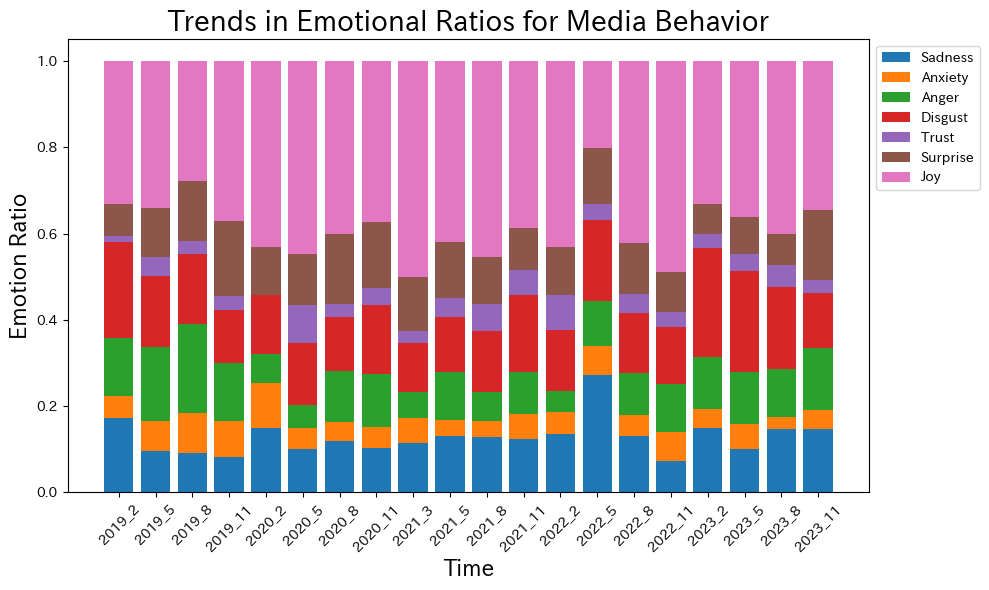

In [24]:
import matplotlib.pyplot as plt
import numpy as np
data_labels = ['data_2019_2', 'data_2019_5', 'data_2019_8', 'data_2019_11', 'data_2020_2', 'data_2020_5', 'data_2020_8', 'data_2020_11', 'data_2021_3', 'data_2021_5', 'data_2021_8', 'data_2021_11', 'data_2022_2', 'data_2022_5', 'data_2022_8', 'data_2022_11', 'data_2023_2', 'data_2023_5', 'data_2023_8', 'data_2023_11']
time_labels = ['2019_2', '2019_5', '2019_8', '2019_11', '2020_2', '2020_5', '2020_8', '2020_11', '2021_3', '2021_5', '2021_8', '2021_11', '2022_2', '2022_5', '2022_8', '2022_11', '2023_2', '2023_5', '2023_8', '2023_11']
# Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']
# 13番目のインデックスに対応する感情割合を抽出
index = 11
emotion_labels = Groups = ['Sadness', 'Anxiety', 'Anger', 'Disgust', 'Trust', 'Surprise', 'Joy']

# 各timeの13番目のインデックスの感情割合を収集
emotion_ratios = []
for label in data_labels:
    emotion_ratios.append(emotion_ratios_dict[label][index])

# 感情割合を配列に変換
emotion_ratios = np.array(emotion_ratios)

# グラフの設定
x = np.arange(len(time_labels))  # timeごとのラベルのインデックス

# 積み上げ棒グラフの作成
fig, ax = plt.subplots(figsize=(10, 6))

# 各感情を順番に積み上げ
bottom = np.zeros(len(time_labels))
for i in range(len(emotion_labels)):
    ax.bar(x, emotion_ratios[:, i], label=emotion_labels[i], bottom=bottom)
    bottom += emotion_ratios[:, i]  # 次の感情を積み上げる位置を調整

# ラベルやタイトルの設定
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Emotion Ratio', fontsize=16)
ax.set_title('Trends in Emotional Ratios for Media Behavior', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(time_labels, rotation=45)
ax.legend(loc='best')

# 凡例を図の外に表示
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# グラフの表示
plt.tight_layout()
plt.show()


In [25]:
# データを整形
data = []
Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']
for key, values in ratios_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            data.append({'Time': key[5:], 'Group': f'Group_{i+1}', 'Category': f'{Category[j]}', 'Ratio': ratio})

# データフレームに変換
df = pd.DataFrame(data)

In [26]:
df.head()

,Time,Group,Category,Ratio
0,2019_2,Group_1,睡眠,0.001043
1,2019_2,Group_1,身の回りの用事,0.000000
2,2019_2,Group_1,食事-飲酒あり,0.000000
3,2019_2,Group_1,食事-飲酒なし・不明,0.001043
4,2019_2,Group_1,通勤・通学,0.001043


In [27]:
new_Category = ['食事-飲酒なし・不明', 'その他の移動', '仕事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養']

### sadness

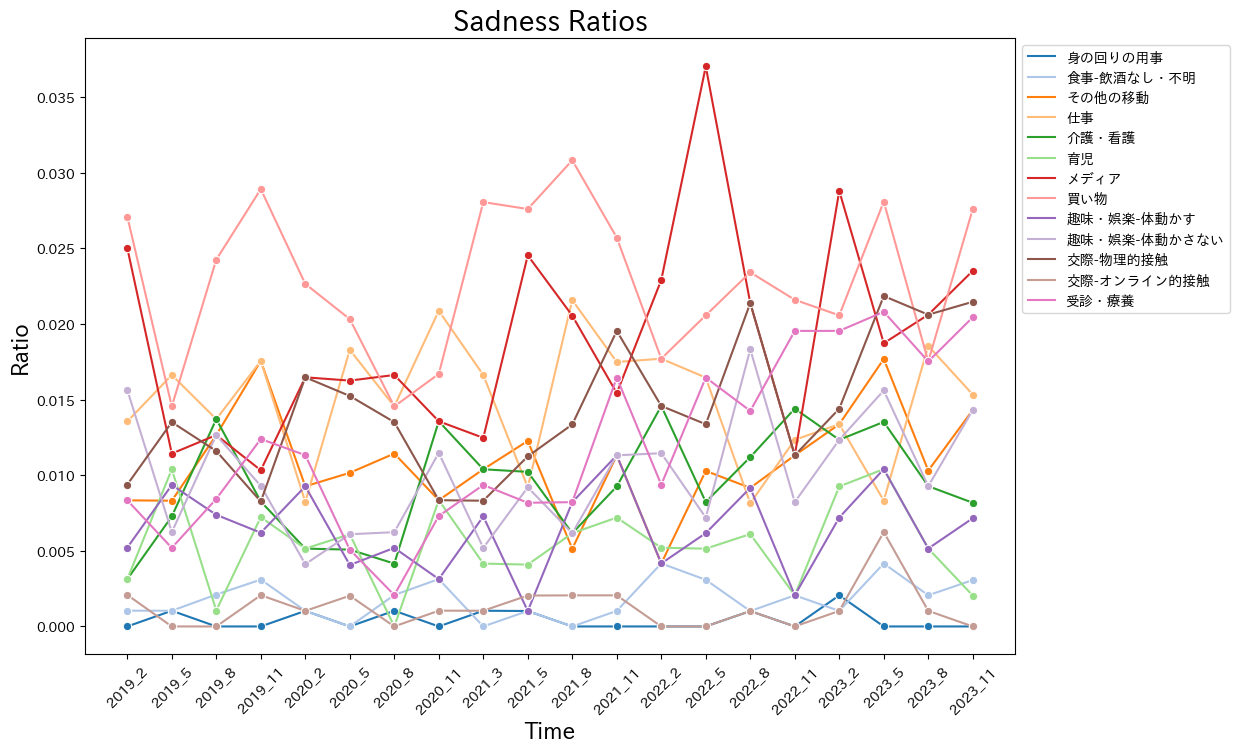

In [28]:
Category = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

new_Category = ['身の回りの用事','食事-飲酒なし・不明', 'その他の移動', '仕事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養']

# Group1を時系列で可視化
# Joy Ratioのグラフを描画
plt.figure(figsize=(12, 8))

# 使用するカラーパレットを指定
palette = sns.color_palette("tab20", n_colors=len(new_Category))

# Groups = ['Sadness', 'Anxiety', 'Anger', 'Disgust', 'Trust', 'Surprise', 'Joy']

# new_Categoryに該当するデータのみをフィルタリング
filtered_df = df[(df['Group'] == 'Group_1') & (df['Category'].isin(new_Category))]

# 折れ線グラフを描画
sns.lineplot(x='Time', y='Ratio', hue='Category', data=filtered_df, marker="o", palette=palette)
# グラフタイトルを設定
plt.title('Sadness Ratios', fontsize=20)

# x軸とy軸のラベルの文字サイズを設定
plt.xlabel('Time', fontsize=16)
plt.ylabel('Ratio', fontsize=16)

# 凡例を図の外に表示
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# x軸のラベルを45度回転
plt.xticks(rotation=45)

plt.show()

In [23]:
import numpy as np

# 変数の準備
data = predictions_dict['data_2023_5'][0]  # 1000行21列のnp.ndarray
texts = data_2023_5[0]['texts']  # 1000個のテキスト
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# 各カテゴリごとに1のインデックスを格納する辞書
indices_dict = {}

# 各列ごとに1のインデックスを取得
for col, category in enumerate(categories):
    indices = np.where(data[:, col] == 1)[0]  # 列における1のインデックスを取得
    indices_dict[category] = indices

# 結果の表示
for category, indices in indices_dict.items():
    print(f"Category: {category}")
    for indice in indices:
        print(f'-{texts[indice]}')
    print("\n")


Category: 睡眠


Category: 身の回りの用事
-洗車して次の日の朝見たら黄砂で真っ白だった。
-朝起きたら寝違えていて、痛みで悲しくなった。


Category: 食事-飲酒あり


Category: 食事-飲酒なし・不明
-外出して食事をするにもお金が無く、好きなものを食べられなく悲しい
-旅行先でいろいろ食べたかったのにパンパンで食べられなかった
-弁当が美味しくなかった
-美味しそうだと思って買った食品が美味しくなかったこと##
-いい食材を手に入れたのに、料理の味付けに失敗して悲しくなった
-料理で失敗した。
-ご飯が炊けたと思ったら、電源を入れてなかった。
-残業で点かれて帰ったら、ご飯は刺し身でいいよと言われた。ご飯さえ炊いていなかった。
-家族が夕飯の買い物をしてきたのだが、自分の食事だけ見切り品だった。


Category: 通勤・通学


Category: その他の移動
-旅行先でいろいろ食べたかったのにパンパンで食べられなかった
-最近、駅前のダイソーに行ったとき店内をグルグル回り上の階に行こうと思って階段を上ろうとした時全く意図せず突然おでこから会談の淵に倒れてぶつかってしまいこぶができ痛みが一週間ほど取れず何の前触れもなく突然このようなことになりショックで悲しくなった。
-出費を抑えるため、安く購入できる店を探して、車で行ことすると、なんでと言われます。
-宴会で飲み過ぎタクシー帰宅したところまで、おぼえているが翌朝、寒くて目がさめたとき、台所で寝ていた。妻の扱いに悲しい思いをした。##
-転んだら怪我した##
-強風と雨が吹き付けるときに外出しなくてはならず、傘を必死で持っていたら、傘が折れたこと。
-これまで親と休日を過ごすことが多かった娘が、最近は彼氏を優先するようになり、外出が増えたことが悲しい。
-せっかく旅行に行ったのに、人が多すぎて、観光地に行くことをあきらめたことです。
-GWに遠出する旅行ができなかった。
-居酒屋にお気に入りの時計を忘れてしまいました。取りに戻ったら無くなっていました。悲しいです。
-たまに行く服屋が完全閉店すると言う事で新幹線で仙台に行きショッピングモールを一万歩歩いた。帰った次の日から腰が痛く通院しているが歳を感じて悲しい。
-ゴールデンウィークに夫の実家へ行った時、上の子が

In [88]:
import numpy as np

# 変数の準備
data = predictions_dict['data_2020_5'][0]  # 1000行21列のnp.ndarray
texts = data_2020_5[0]['texts']  # 1000個のテキスト
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# 各カテゴリごとに1のインデックスを格納する辞書
indices_dict = {}

# 各列ごとに1のインデックスを取得
for col, category in enumerate(categories):
    indices = np.where(data[:, col] == 1)[0]  # 列における1のインデックスを取得
    indices_dict[category] = indices

# 結果の表示
for category, indices in indices_dict.items():
    print(f"Category: {category}")
    for indice in indices:
        print(f'-{texts[indice]}')
    print("\n")


Category: 睡眠


Category: 身の回りの用事


Category: 食事-飲酒あり


Category: 食事-飲酒なし・不明
-最後の一口のから揚げを落とした
-がんばって作った料理を食べてもらえなかった。
-腕を振るって、晩ご飯作ったのに、子どもが食べなかった事。
-手作りの料理にケチをつけられた


Category: 通勤・通学
-新型コロナを理由に出張から帰った際に、「出勤して大丈夫？」の声なき声が聞こえてきたとき。


Category: その他の移動
-晴れていたのに外出したとたんに雨が降り出して悲しい気持ちだった
-雨が降りそうになかったのであえて傘を持たずに出かけたが、天気予報が外れて大雨になって雨に打たれて帰ることになり悲しかった。
-外出自粛のため、車に乗るのを控えていたら、バッテリーがあがってしまった。
-夫が勝手に遠い町までのバスチケットを買っていて、一生懸命節約しようとしている家族に知らせないまま行こうとしていたことです。
-ゴミの日を間違って##車の中にゴミ袋を乗せたまま##小一時間走り、臭くなってきた。
-コロナ感染拡大防止のための自粛生活の中、どうしても仕事に行かなければならず、家を出たところ、ウォーキングしているご近所の方々に出会った。いつものように「おはようございます」とあいさつをしたが、返事をしてもらえなかった。そして、通りすぎてから、明らかに聞こえよがしに、「こんな時に出かけるなんて、たいそうな仕事をしているんだね。そんなお偉い人とは、もう口をきかない方がいいね」と言われ、悲しい思いをした。
-車の運転を誤って自宅の壁にこすってしまい傷つけてしまった。
-楽しみにしていた国内旅行が、新型コロナの影響で、宿からキャンセルの連絡があり、悲しく感じました。
-小さいことだが、帰宅時に雨が降っており、傘もなく、小雨だったので暫く待てば止むかと思ったが、余計に雨がひどくなってしまった。
-沖縄旅行を計画していて行こうとはしてましたが、この度の緊急事態宣言でなくなりました。
-旅行に行く前日にインフルエンザにかかり、高額なキャンセル料がかかった。
-ゴールデンウィークに家族旅行を計画していたが、コロナウイルスによる自粛により、旅行に行けなくなってしまったこと。
-大学進学が決まり引越し先のアパートを探していたが、

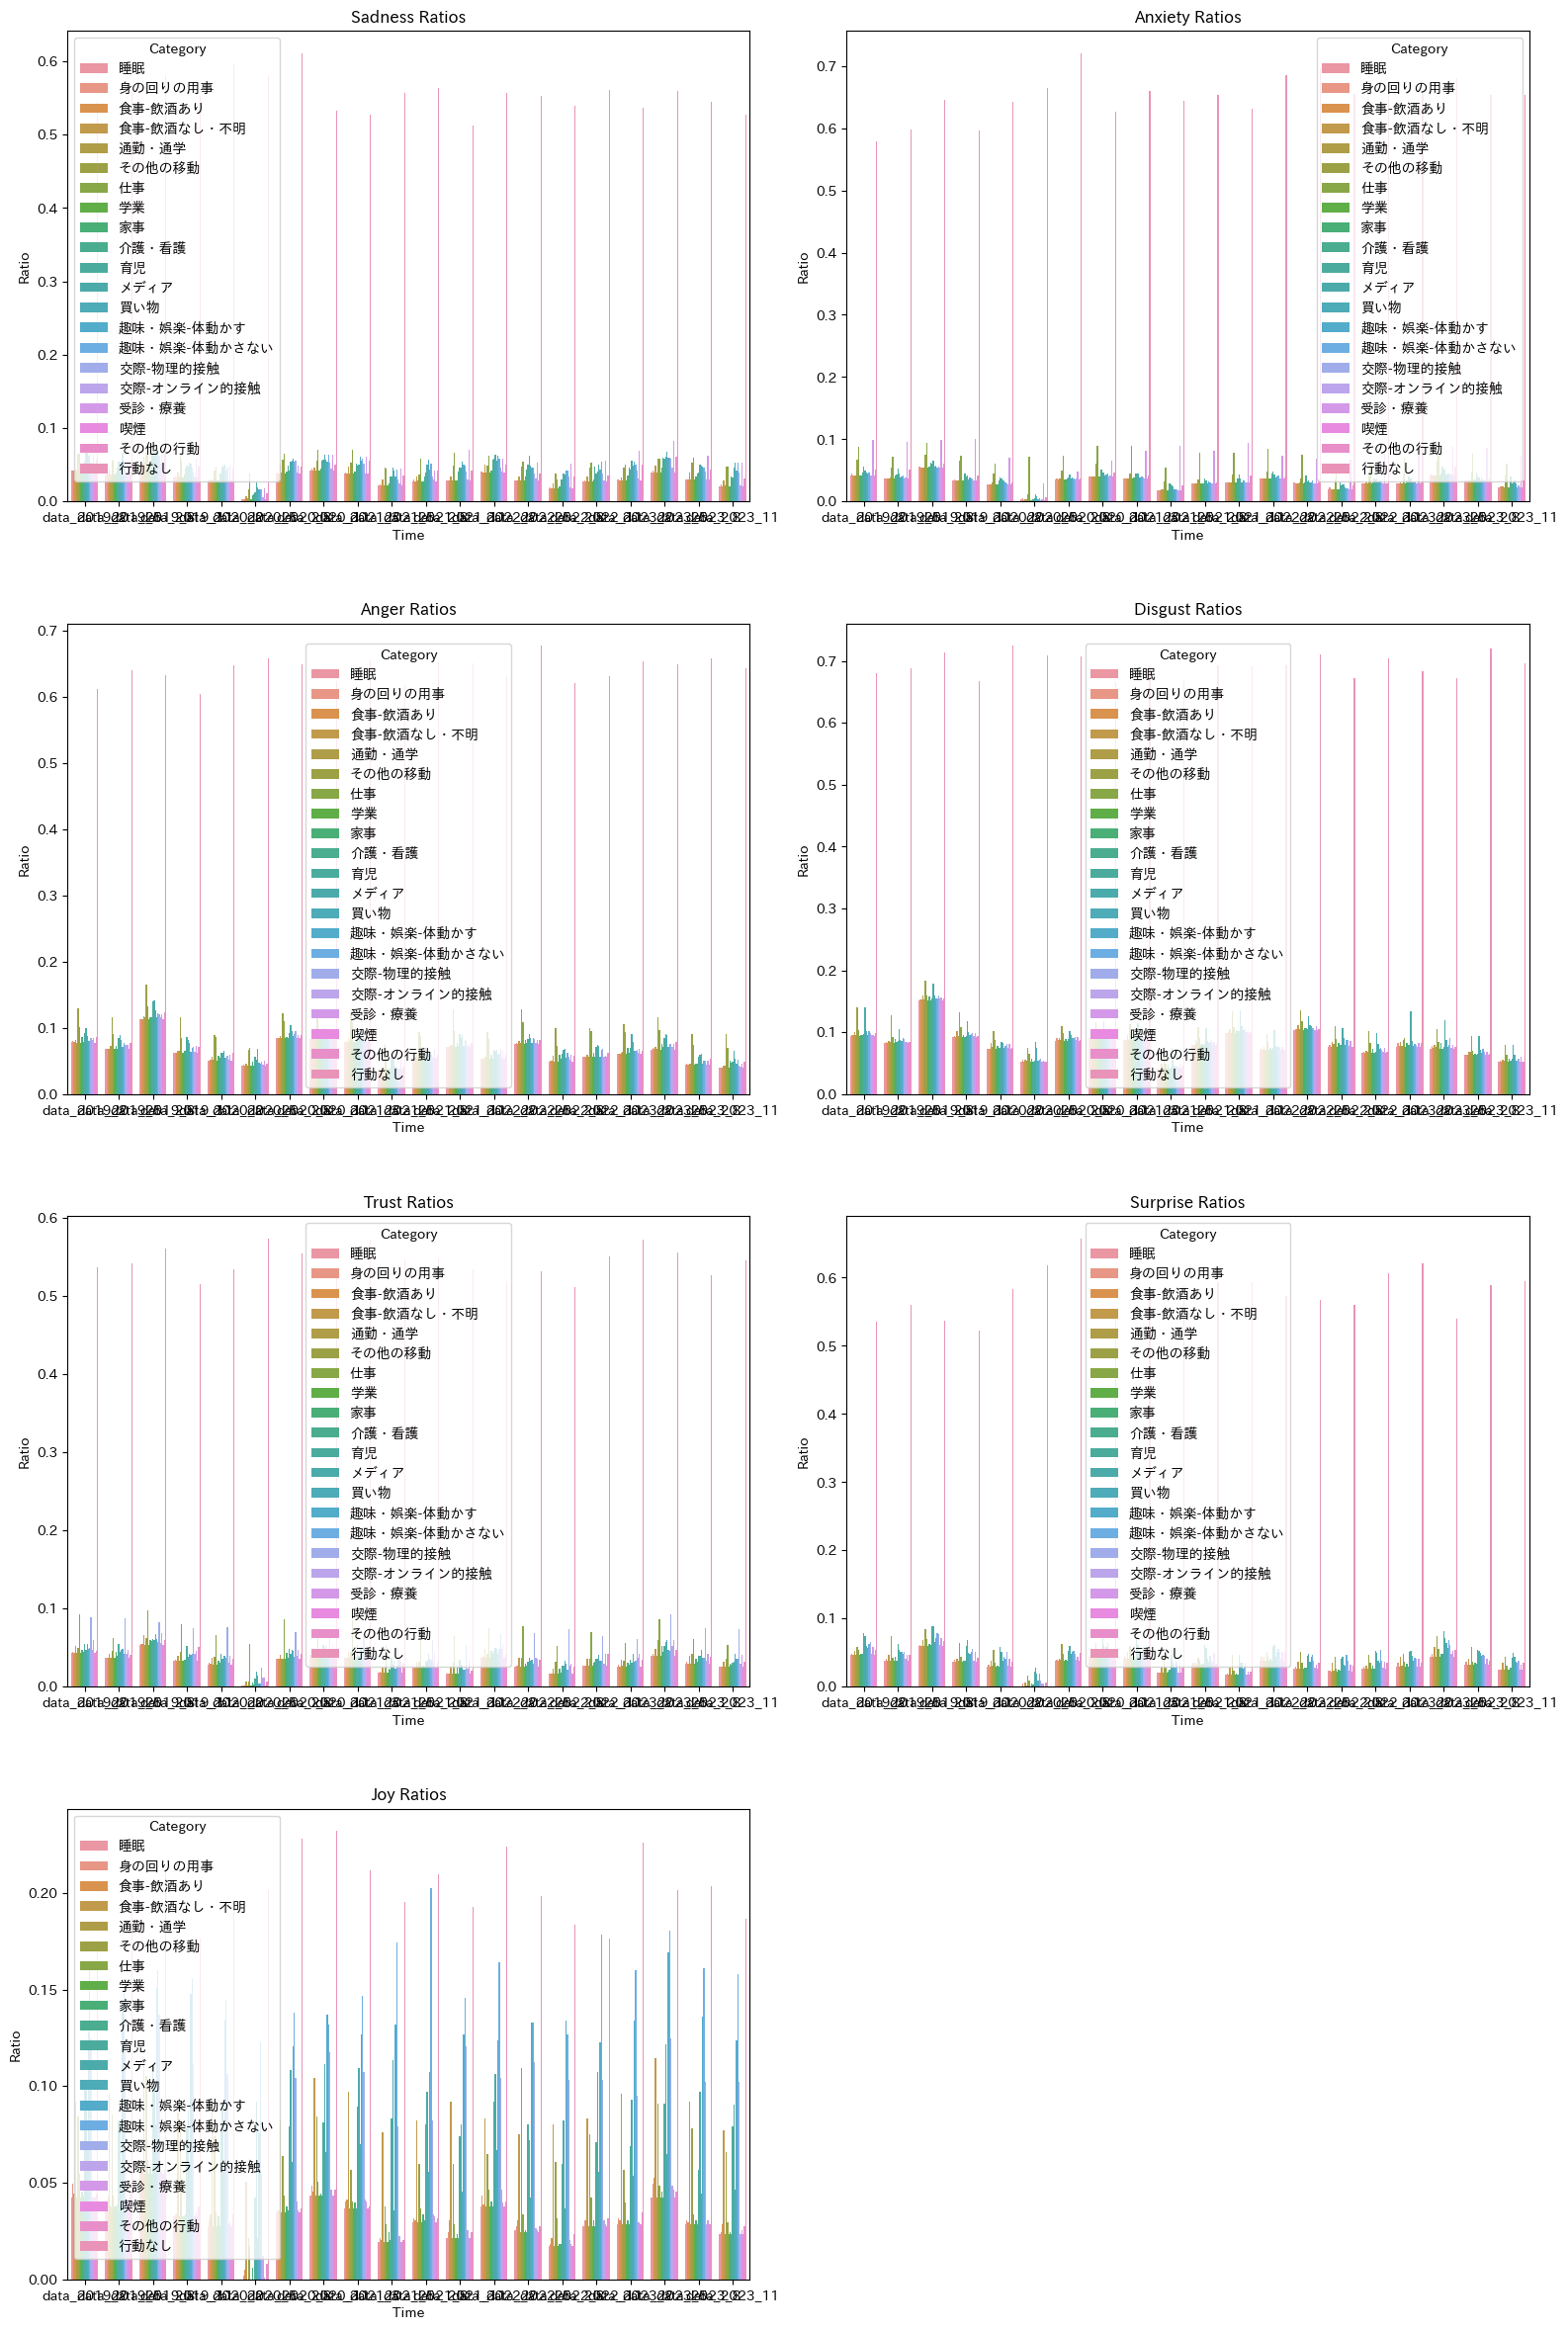

In [40]:
# 感情カテゴリのリスト
Groups = ['Sadness', 'Anxiety', 'Anger', 'Disgust', 'Trust', 'Surprise', 'Joy']
categories = ['睡眠', '身の回りの用事', '食事-飲酒あり', '食事-飲酒なし・不明', '通勤・通学', 'その他の移動', '仕事', '学業', '家事', '介護・看護', '育児', 'メディア', '買い物', '趣味・娯楽-体動かす', '趣味・娯楽-体動かさない', '交際-物理的接触', '交際-オンライン的接触', '受診・療養', '喫煙', 'その他の行動', '行動なし']

# データを整形
data = []
for key, values in ratios_dict.items():
    for i, value in enumerate(values):
        for j, ratio in enumerate(value):
            if j < len(categories):  # カテゴリの数を超えないようにする
                data.append({'Time': key, 'Group': Groups[i], 'Category': categories[j], 'Ratio': ratio})

# データフレームに変換
df = pd.DataFrame(data)

# サブプロットの設定
fig, axes = plt.subplots(4, 2, figsize=(16, 24))  # 4行2列のサブプロットを作成
axes = axes.flatten()  # 2次元配列を1次元に変換

# 各感情カテゴリのグラフを描画
for i, group in enumerate(Groups):
    sns.barplot(ax=axes[i], x='Time', y='Ratio', hue='Category', data=df[df['Group'] == group])
    axes[i].set_title(f'{group} Ratios')

# 余分なサブプロットを削除
for j in range(len(Groups), len(axes)):
    fig.delaxes(axes[j])

# レイアウトの調整
plt.tight_layout()
plt.show()

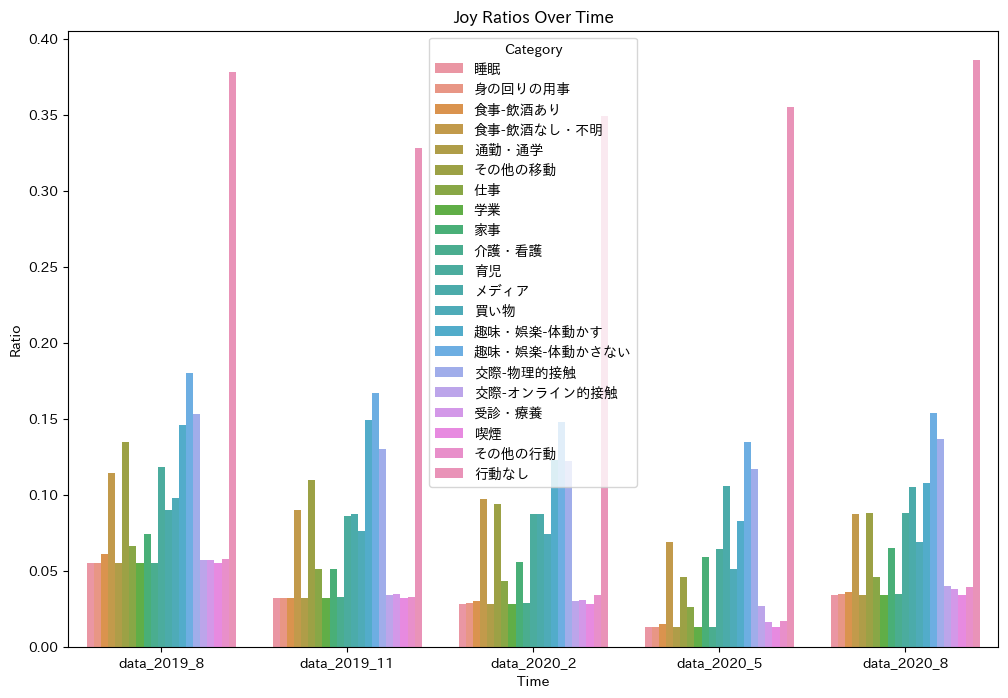

In [56]:
# Joy Ratioのグラフを描画
plt.figure(figsize=(12, 8))
sns.barplot(x='Time', y='Ratio', hue='Category', data=df[df['Group'] == 'Joy'])
plt.title('Joy Ratios Over Time')
plt.show()

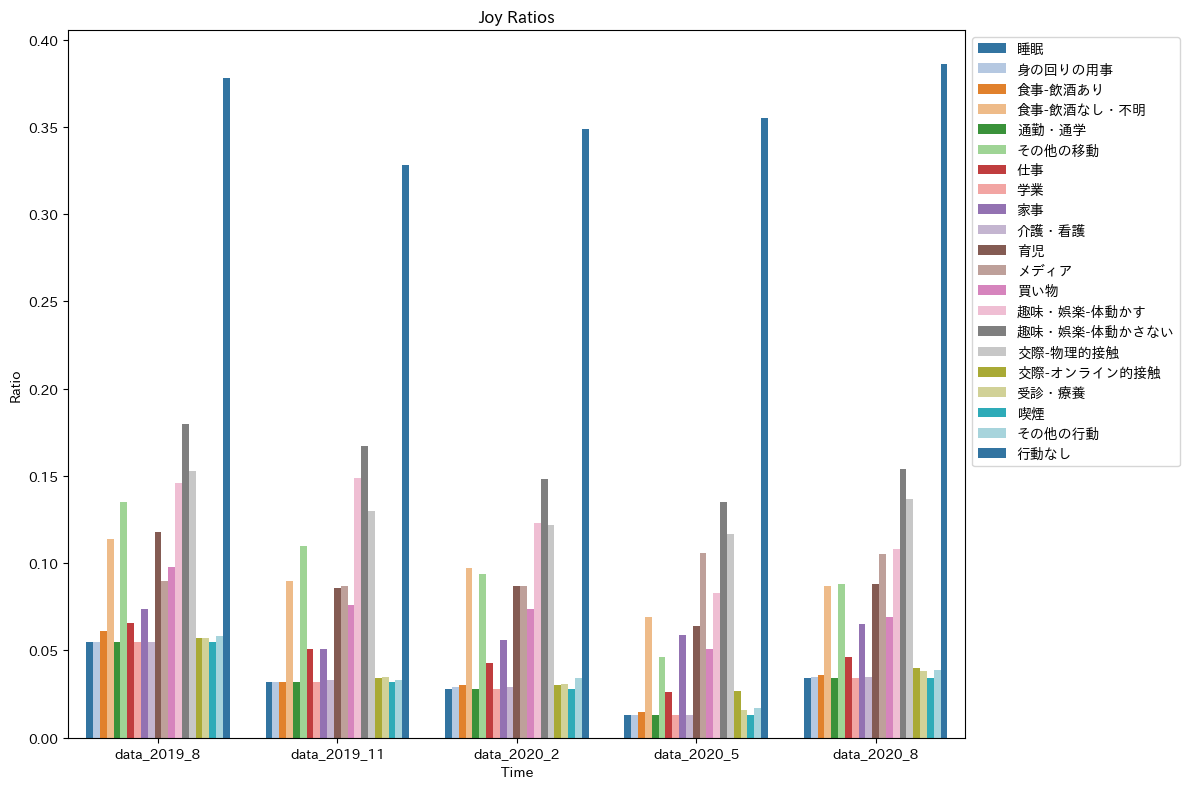

In [58]:
# Joy Ratioのグラフを描画
plt.figure(figsize=(12, 8))

# 使用するカラーパレットを指定
palette = sns.color_palette("tab20", n_colors=len(categories))

sns.barplot(x='Time', y='Ratio', hue='Category', data=df[df['Group'] == 'Joy'], palette=palette)
plt.title('Joy Ratios')

# 凡例を図の外に表示
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### ドメイン適応

In [24]:
### Trainer取得
# 使用モデルの読み込み
# 最初の分析の時のモデル
# model = AutoModelForSequenceClassification.from_pretrained('/home/is/akiyoshi-n/my-project/outputs/2024-08-20/cl-tohoku/bert-base-japanese-v3/2024-08-20T15-40-08/checkpoint-1806')
model = AutoModelForSequenceClassification.from_pretrained('/home/is/akiyoshi-n/my-project/outputs/2024-09-08/cl-tohoku/bert-base-japanese-v3/2024-09-08T15-27-02/checkpoint-1743')
trainer = MultilabelTrainer(model = model)

In [25]:
# 東北大BERT-v3
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'
Classifier_model = MultiClassClassifier(model_name=MODEL_NAME, num_labels=21, seed=SEED, thresh=THRESH)

In [26]:
# 必要なライブラリ取得
from src.my_project.dataset import load_multiclass_dataset

In [27]:
# Twitterデータセットの読み込み
data, class_name = load_multiclass_dataset(f"{DATASET_PATH}/act_classification_final.xlsx")

In [28]:
data_labels_np = np.array(data['labels'])
data_labels_np.sum(axis=0)

array([ 21,  12,  18,  46,   3,  56,  22,   1,  12,   4, 138,  28,  18,
        81,  11,  54,   5,   1,   6, 600])

In [29]:
# data['labels']の介護の部分(前から10列目)に0を挿入
for sublist in data['labels']:
    sublist.insert(9, 0)

In [30]:
# しっかりと12と4の間に０が挿入されているのが分かる
data_labels_np = np.array(data['labels'])
data_labels_np.sum(axis=0)

array([ 21,  12,  18,  46,   3,  56,  22,   1,  12,   0,   4, 138,  28,
        18,  81,  11,  54,   5,   1,   6, 600])

In [31]:
prediction = Classifier_model.predict(trainer, data, MAX_LEN)

Map:   0%|          | 0/1100 [00:00<?, ? examples/s]

In [37]:
len(prediction)

1100

In [33]:
data['labels']

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,

In [38]:
from sklearn.metrics import accuracy_score, f1_score

In [39]:
# accuracyを計算
accuracy = round(accuracy_score(y_true=data['labels'], y_pred=prediction), 3)
# macro f1を計算
macro_f1 = round(f1_score(y_true=data['labels'], y_pred=prediction, average='macro', zero_division=0), 3)

print("Average accuracy:", accuracy)
print("Average Macro f1:", macro_f1)

Average accuracy: 0.409
Average Macro f1: 0.184


In [40]:
# predictionの行全てが０の場合を除く性能評価
# 予測が全て0の場合を除く
mask = np.any(prediction, axis=1)
print("mask:", mask)

# 予測が全て0の場合を除いたデータ
prediction_filtered = prediction[mask]
data_filtered = data['labels'][mask]

# accuracyを計算
accuracy = round(accuracy_score(y_true=data_filtered, y_pred=prediction_filtered), 3)
# macro f1を計算
macro_f1 = round(f1_score(y_true=data_filtered, y_pred=prediction_filtered, average='macro', zero_division=0), 3)

mask: [False  True False ...  True  True False]


TypeError: only integer scalar arrays can be converted to a scalar index

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# 予測結果が全て0の場合を除外
mask = np.any(prediction, axis=1)
print("mask:", mask)

# Trueの個数を表示
print("Number of non-zero predictions:", np.sum(mask))

# 予測とラベルデータをNumPy配列に変換（必要に応じて）
prediction_filtered = np.array(prediction)[mask]
data_filtered = np.array(data['labels'])[mask]

# accuracyを計算
accuracy = round(accuracy_score(y_true=data_filtered, y_pred=prediction_filtered), 3)
# macro f1を計算
macro_f1 = round(f1_score(y_true=data_filtered, y_pred=prediction_filtered, average='macro', zero_division=0), 3)

print("Accuracy:", accuracy)
print("Macro F1:", macro_f1)


mask: [False  True False ...  True  True False]
Number of non-zero predictions: 741
Accuracy: 0.607
Macro F1: 0.249
